In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statistics

In [2]:
train = pd.read_csv("train.csv")
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
train.shape

(100000, 28)

In [4]:
test = pd.read_csv("test.csv")
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
test.shape

(50000, 27)

In [6]:
# merging train and test datasets
bank = pd.concat([train, test], axis=0)

In [7]:
bank.shape

(150000, 28)

In [8]:
bank.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  ob

In [10]:
# let's seperate categorical and numerical variables seperately
num_col = bank.select_dtypes(include=np.number)
cat_col = bank.select_dtypes(include=object)

In [11]:
cat_col.shape

(150000, 20)

In [12]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age   

In [13]:
cat_col.isnull().sum()
# count of null values

ID                             0
Customer_ID                    0
Month                          0
Name                       15000
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Num_of_Loan                    0
Type_of_Loan               17112
Num_of_Delayed_Payment     10500
Changed_Credit_Limit           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_History_Age         13500
Payment_of_Min_Amount          0
Amount_invested_monthly     6750
Payment_Behaviour              0
Monthly_Balance             1762
Credit_Score               50000
dtype: int64

In [14]:
(cat_col.isnull().sum()/len(cat_col))*100
# percentage of null values in categorical_columns

ID                          0.000000
Customer_ID                 0.000000
Month                       0.000000
Name                       10.000000
Age                         0.000000
SSN                         0.000000
Occupation                  0.000000
Annual_Income               0.000000
Num_of_Loan                 0.000000
Type_of_Loan               11.408000
Num_of_Delayed_Payment      7.000000
Changed_Credit_Limit        0.000000
Credit_Mix                  0.000000
Outstanding_Debt            0.000000
Credit_History_Age          9.000000
Payment_of_Min_Amount       0.000000
Amount_invested_monthly     4.500000
Payment_Behaviour           0.000000
Monthly_Balance             1.174667
Credit_Score               33.333333
dtype: float64

In [15]:
cat_col.nunique()
# count of unique values

ID                         150000
Customer_ID                 12500
Month                          12
Name                        10139
Age                          2524
SSN                         12501
Occupation                     16
Annual_Income               21192
Num_of_Loan                   623
Type_of_Loan                 6260
Num_of_Delayed_Payment       1058
Changed_Credit_Limit         4605
Credit_Mix                      4
Outstanding_Debt            13622
Credit_History_Age            408
Payment_of_Min_Amount           3
Amount_invested_monthly    136497
Payment_Behaviour               7
Monthly_Balance            148224
Credit_Score                    3
dtype: int64

In [16]:
# let's check the count of null values in the bank
bank.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [17]:
(bank.isnull().sum()/len(bank))*100
# percentage of null values in the dataset bank

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

In [18]:
bank.shape

(150000, 28)

In [19]:
# intially we have 1,50,000 rows and 28 columns 
# let's drop the null values and we'll check

In [20]:
df = bank.dropna(axis=0)

In [21]:
df.shape

(53049, 28)

In [22]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [23]:
# let's seperate categorical and numerical variables seperately
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(include=object)

In [24]:
cat_col.shape

(53049, 20)

In [25]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       53049 non-null  object
 1   Customer_ID              53049 non-null  object
 2   Month                    53049 non-null  object
 3   Name                     53049 non-null  object
 4   Age                      53049 non-null  object
 5   SSN                      53049 non-null  object
 6   Occupation               53049 non-null  object
 7   Annual_Income            53049 non-null  object
 8   Num_of_Loan              53049 non-null  object
 9   Type_of_Loan             53049 non-null  object
 10  Num_of_Delayed_Payment   53049 non-null  object
 11  Changed_Credit_Limit     53049 non-null  object
 12  Credit_Mix               53049 non-null  object
 13  Outstanding_Debt         53049 non-null  object
 14  Credit_History_Age       53049 non-nul

In [26]:
cat_col.isnull().sum()
# count of null values

ID                         0
Customer_ID                0
Month                      0
Name                       0
Age                        0
SSN                        0
Occupation                 0
Annual_Income              0
Num_of_Loan                0
Type_of_Loan               0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Credit_Mix                 0
Outstanding_Debt           0
Credit_History_Age         0
Payment_of_Min_Amount      0
Amount_invested_monthly    0
Payment_Behaviour          0
Monthly_Balance            0
Credit_Score               0
dtype: int64

In [27]:
(cat_col.isnull().sum()/len(cat_col))*100
# percentage of null values in categorical_columns

ID                         0.0
Customer_ID                0.0
Month                      0.0
Name                       0.0
Age                        0.0
SSN                        0.0
Occupation                 0.0
Annual_Income              0.0
Num_of_Loan                0.0
Type_of_Loan               0.0
Num_of_Delayed_Payment     0.0
Changed_Credit_Limit       0.0
Credit_Mix                 0.0
Outstanding_Debt           0.0
Credit_History_Age         0.0
Payment_of_Min_Amount      0.0
Amount_invested_monthly    0.0
Payment_Behaviour          0.0
Monthly_Balance            0.0
Credit_Score               0.0
dtype: float64

In [28]:
cat_col.nunique()
# count of unique values

ID                         53049
Customer_ID                11071
Month                          8
Name                        9168
Age                         1057
SSN                        11064
Occupation                    16
Annual_Income              14707
Num_of_Loan                  249
Type_of_Loan                6259
Num_of_Delayed_Payment       470
Changed_Credit_Limit        3975
Credit_Mix                     4
Outstanding_Debt           11407
Credit_History_Age           404
Payment_of_Min_Amount          3
Amount_invested_monthly    50540
Payment_Behaviour              7
Monthly_Balance            53044
Credit_Score                   3
dtype: int64

In [29]:
num_col.shape

(53049, 8)

In [30]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Monthly_Inhand_Salary     53049 non-null  float64
 1   Num_Bank_Accounts         53049 non-null  int64  
 2   Num_Credit_Card           53049 non-null  int64  
 3   Interest_Rate             53049 non-null  int64  
 4   Delay_from_due_date       53049 non-null  int64  
 5   Num_Credit_Inquiries      53049 non-null  float64
 6   Credit_Utilization_Ratio  53049 non-null  float64
 7   Total_EMI_per_month       53049 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.6 MB


In [31]:
# there are few columns in the catgeorical columns which needs to be converted into numbers
# age, annual_income, monthly_inhand_salary,... ; let's look into that

In [32]:
cat_col.nunique()
# we have 53049 unique values in ID and we can drop it becoz we cant make any pattern from it

# Amount_invested_monthly, Monthly_Balance these both also have more than 50k unique values out of 53k unique values
# we are not going to drop these two becoz these needs to be converted into numerical columns

ID                         53049
Customer_ID                11071
Month                          8
Name                        9168
Age                         1057
SSN                        11064
Occupation                    16
Annual_Income              14707
Num_of_Loan                  249
Type_of_Loan                6259
Num_of_Delayed_Payment       470
Changed_Credit_Limit        3975
Credit_Mix                     4
Outstanding_Debt           11407
Credit_History_Age           404
Payment_of_Min_Amount          3
Amount_invested_monthly    50540
Payment_Behaviour              7
Monthly_Balance            53044
Credit_Score                   3
dtype: int64

In [33]:
cat_col.drop('ID', axis=1, inplace=True)

In [34]:
for i in cat_col:
    print(i)
    print()
    print(cat_col[i].value_counts())
    print('-------------------')

Customer_ID

CUS_0x533b    8
CUS_0x912e    8
CUS_0x18ab    8
CUS_0x5794    8
CUS_0xa319    8
             ..
CUS_0xa201    1
CUS_0x72bc    1
CUS_0x6611    1
CUS_0xb367    1
CUS_0x8fee    1
Name: Customer_ID, Length: 11071, dtype: int64
-------------------
Month

January     6744
May         6649
July        6637
June        6629
August      6624
April       6609
February    6589
March       6568
Name: Month, dtype: int64
-------------------
Name

Stevex                30
Jonathan Stempelr     29
Nicko                 28
Jessicad              27
Deepa Seetharamanm    27
                      ..
Michael Taylorz        1
Wheatleyi              1
Kenf                   1
Arosioj                1
Le                     1
Name: Name, Length: 9168, dtype: int64
-------------------
Age

38       1567
28       1519
26       1480
34       1469
44       1460
         ... 
8081        1
7549        1
4583_       1
3988_       1
1342        1
Name: Age, Length: 1057, dtype: int64
------------------

### AGE

In [35]:
cat_col['Age'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['23', '28_', '28', ..., '8425', '2263', '1342'], dtype=object)

In [36]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Age']:
    if '_' in i:
        c +=1
print(c)

2626


In [37]:
# there are totally 2626 rows which has '_' in it, let's remove it and impute age>100 and age<0 with customer wise

In [38]:
# cat_col['Age'] = cat_col['Age'].apply(lambda x: x.rstrip('_') if '_' in x else x)

In [39]:
# let write a function to remove those characters and the right end:
def r_sp_chr(x):
    if '_' in x:
        return x.rstrip('_')        
    else:
        return x

In [40]:
# let write a function to remove those characters and the left end:
def l_sp_chr(x):
    if '_' in x:
        return x.lstrip('_')        
    else:
        return x

In [41]:
def gr_merge_ct_mod(cat_col, groupby_column):
    grouped_ct_mod =  cat_col.groupby(by='Customer_ID', as_index=False)[groupby_column].apply(statistics.mode) 
    merged_ct_mod = pd.merge(left=cat_col, right=grouped_ct_mod, on='Customer_ID')
    return merged_ct_mod

In [42]:
def gr_merge_ct_med(cat_col, groupby_column):
    grouped_ct_med =  cat_col.groupby(by='Customer_ID', as_index=False)[groupby_column].median() 
    merged_ct_med = pd.merge(left=cat_col, right=grouped_ct_med, on='Customer_ID')
    return merged_ct_med

In [43]:
# def fillna(cat_col, nan_column, mod_med_col):
#     fill_na = cat_col[nan_column].fillna(cat_col[mod_med_col])
# #    drop_columns = cat_col.drop(columns=[mod_med_col])
#     return fill_na

In [44]:
cat_col['new_age'] = cat_col['Age'].apply(r_sp_chr)

In [45]:
cat_col['new_age'] = cat_col['new_age'].astype(int)

In [46]:
cat_col['new_age'] = cat_col['new_age'].apply(lambda x: np.NaN if (x<0)|(x>100) else x)

In [47]:
# using a function which groupby customer_ID using median and merge it with dataframe
cat_col = gr_merge_ct_med(cat_col, 'new_age')

In [48]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'Age','new_age_x', 'new_age_y']]

,Customer_ID,Age,new_age_x,new_age_y
1126,CUS_0xf23,42,42.0,42.0
1127,CUS_0xf23,42,42.0,42.0
1128,CUS_0xf23,42,42.0,42.0
1129,CUS_0xf23,42,42.0,42.0
1130,CUS_0xf23,-500,NaN,42.0
1131,CUS_0xf23,43,43.0,42.0
1132,CUS_0xf23,43,43.0,42.0


In [49]:
cat_col['sorted_Age'] = cat_col['new_age_x'].fillna(cat_col['new_age_y'])

In [50]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'Age','new_age_x', 'new_age_y', 'sorted_Age']]

,Customer_ID,Age,new_age_x,new_age_y,sorted_Age
1126,CUS_0xf23,42,42.0,42.0,42.0
1127,CUS_0xf23,42,42.0,42.0,42.0
1128,CUS_0xf23,42,42.0,42.0,42.0
1129,CUS_0xf23,42,42.0,42.0,42.0
1130,CUS_0xf23,-500,NaN,42.0,42.0
1131,CUS_0xf23,43,43.0,42.0,43.0
1132,CUS_0xf23,43,43.0,42.0,43.0


In [51]:
cat_col.drop(columns=['new_age_x', 'new_age_y'], axis=1, inplace=True)

In [52]:
# cat_col.head()

### SSN

In [53]:
cat_col['SSN'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['821-00-0265', '004-07-5839', '486-85-3974', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [54]:
cat_col['SSN'].value_counts()

#F%$D@*&8      2971
842-95-1336       8
279-66-3207       8
918-26-9767       8
138-71-8952       8
               ... 
980-65-8757       1
754-01-5850       1
035-83-1012       1
848-91-6762       1
142-75-5225       1
Name: SSN, Length: 11064, dtype: int64

In [55]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['SSN']:
    if '#F%$D@*&8' in i:
        c +=1
print(c)

2971


In [56]:
cat_col['new_ssn'] = cat_col['SSN'].replace('#F%$D@*&8', np.NaN)

In [57]:
# cat_col[cat_col['SSN'] == '#F%$D@*&8'][['Customer_ID', 'SSN', 'new_ssn']]

In [58]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb891'][['Customer_ID', 'SSN', 'new_ssn']]

,Customer_ID,SSN,new_ssn
12,CUS_0xb891,072-31-6145,072-31-6145
13,CUS_0xb891,072-31-6145,072-31-6145
14,CUS_0xb891,072-31-6145,072-31-6145
15,CUS_0xb891,072-31-6145,072-31-6145
16,CUS_0xb891,072-31-6145,072-31-6145
17,CUS_0xb891,#F%$D@*&8,NaN
18,CUS_0xb891,072-31-6145,072-31-6145


In [59]:
# using a function which groupby customer_ID using mode and merge it with dataframe
cat_col = gr_merge_ct_mod(cat_col, 'new_ssn')

In [60]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'new_ssn_x', 'new_ssn_y'],
      dtype='object')

In [61]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb891'][['Customer_ID', 'SSN', 'new_ssn_x', 'new_ssn_y']]

,Customer_ID,SSN,new_ssn_x,new_ssn_y
12,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145
13,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145
14,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145
15,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145
16,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145
17,CUS_0xb891,#F%$D@*&8,NaN,072-31-6145
18,CUS_0xb891,072-31-6145,072-31-6145,072-31-6145


In [62]:
cat_col['sorted_SSN'] = cat_col['new_ssn_x'].fillna(cat_col['new_ssn_y'])

In [63]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'SSN', 'new_ssn_x', 'new_ssn_y', 'sorted_SSN']]

,Customer_ID,SSN,new_ssn_x,new_ssn_y,sorted_SSN
1126,CUS_0xf23,#F%$D@*&8,NaN,634-61-3484,634-61-3484
1127,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484
1128,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484
1129,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484
1130,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484
1131,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484
1132,CUS_0xf23,634-61-3484,634-61-3484,634-61-3484,634-61-3484


In [64]:
cat_col.drop(columns=['new_ssn_x', 'new_ssn_y'], axis=1, inplace=True)

In [65]:
cat_col.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sorted_Age,sorted_SSN
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0,821-00-0265
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,Good,809.98,22 Years and 7 Months,No,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,23.0,821-00-0265
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,Good,605.03,26 Years and 7 Months,No,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,28.0,004-07-5839
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,Good,605.03,26 Years and 8 Months,No,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,28.0,004-07-5839
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,_,605.03,26 Years and 9 Months,No,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,28.0,004-07-5839


### Occupation

In [66]:
cat_col['Occupation'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [67]:
cat_col['Occupation'].value_counts()

_______          3727
Lawyer           3558
Mechanic         3419
Doctor           3344
Teacher          3341
Entrepreneur     3326
Architect        3325
Engineer         3321
Media_Manager    3306
Accountant       3305
Scientist        3281
Developer        3279
Writer           3150
Musician         3136
Journalist       3124
Manager          3107
Name: Occupation, dtype: int64

In [68]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Occupation']:
    if '_______' in i:
        c +=1
print(c)

3727


In [69]:
cat_col['new_Occupation'] = cat_col['Occupation'].replace('_______', np.NaN)

In [70]:
 cat_col[cat_col['Occupation'] == '_______'][['Customer_ID', 'Occupation', 'new_Occupation']]

,Customer_ID,Occupation,new_Occupation
2,CUS_0x21b1,_______,NaN
8,CUS_0x2dbc,_______,NaN
9,CUS_0x2dbc,_______,NaN
17,CUS_0xb891,_______,NaN
26,CUS_0x5407,_______,NaN
...,...,...,...
52989,CUS_0x89aa,_______,NaN
53000,CUS_0x1619,_______,NaN
53006,CUS_0x2654,_______,NaN
53016,CUS_0xb11c,_______,NaN


In [71]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x21b1'][['Customer_ID', 'Occupation', 'new_Occupation']]

,Customer_ID,Occupation,new_Occupation
2,CUS_0x21b1,_______,NaN
3,CUS_0x21b1,Teacher,Teacher
4,CUS_0x21b1,Teacher,Teacher
5,CUS_0x21b1,Teacher,Teacher
6,CUS_0x21b1,Teacher,Teacher
7,CUS_0x21b1,Teacher,Teacher


In [72]:
# using a function which groupby customer_ID using mode and merge it with dataframe
cat_col = gr_merge_ct_mod(cat_col, 'new_Occupation')

In [73]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'new_Occupation_x',
       'new_Occupation_y'],
      dtype='object')

In [74]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb891'][['Customer_ID', 'Occupation', 'new_Occupation_x', 'new_Occupation_y']]

,Customer_ID,Occupation,new_Occupation_x,new_Occupation_y
12,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur
13,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur
14,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur
15,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur
16,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur
17,CUS_0xb891,_______,NaN,Entrepreneur
18,CUS_0xb891,Entrepreneur,Entrepreneur,Entrepreneur


In [75]:
cat_col['sorted_Occupation'] = cat_col['new_Occupation_x'].fillna(cat_col['new_Occupation_y'])

In [76]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'Occupation', 'new_Occupation_x', 'new_Occupation_y', 'sorted_Occupation']]

,Customer_ID,Occupation,new_Occupation_x,new_Occupation_y,sorted_Occupation
1126,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic
1127,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic
1128,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic
1129,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic
1130,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic
1131,CUS_0xf23,_______,NaN,Mechanic,Mechanic
1132,CUS_0xf23,Mechanic,Mechanic,Mechanic,Mechanic


In [77]:
cat_col.drop(columns=['new_Occupation_x', 'new_Occupation_y'], axis=1, inplace=True)

In [78]:
cat_col.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0,821-00-0265,Scientist
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,809.98,22 Years and 7 Months,No,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,23.0,821-00-0265,Scientist
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,605.03,26 Years and 7 Months,No,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,28.0,004-07-5839,Teacher
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,605.03,26 Years and 8 Months,No,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,28.0,004-07-5839,Teacher
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,605.03,26 Years and 9 Months,No,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,28.0,004-07-5839,Teacher


### Annual_Income

In [79]:
cat_col['Annual_Income'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [80]:
# cat_col['Annual_Income'].value_counts()

In [81]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Occupation']:
    if '_' in i:
        c +=1
print(c)

7033


In [82]:
cat_col['new_Annual_Income'] = cat_col['Annual_Income'].apply(r_sp_chr)

In [83]:
cat_col['new_Annual_Income'] = cat_col['new_Annual_Income'].astype(float)

In [84]:
cat_col['new_Annual_Income'].describe()

count    5.304900e+04
mean     1.777168e+05
std      1.456239e+06
min      7.005930e+03
25%      1.887320e+04
50%      3.604808e+04
75%      6.989576e+04
max      2.419806e+07
Name: new_Annual_Income, dtype: float64

In [85]:
cat_col.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,new_Annual_Income
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0,821-00-0265,Scientist,19114.12
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,22 Years and 7 Months,No,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,23.0,821-00-0265,Scientist,19114.12
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,26 Years and 7 Months,No,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,28.0,004-07-5839,Teacher,34847.84
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,26 Years and 8 Months,No,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,28.0,004-07-5839,Teacher,34847.84
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,26 Years and 9 Months,No,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,28.0,004-07-5839,Teacher,34847.84


In [86]:
cat_col.rename(columns={'new_Annual_Income': 'sorted_Annual_Income'}, inplace=True)

In [87]:
cat_col.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,23.0,821-00-0265,Scientist,19114.12
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,22 Years and 7 Months,No,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,23.0,821-00-0265,Scientist,19114.12
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,26 Years and 7 Months,No,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,28.0,004-07-5839,Teacher,34847.84
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,26 Years and 8 Months,No,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,28.0,004-07-5839,Teacher,34847.84
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,26 Years and 9 Months,No,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,28.0,004-07-5839,Teacher,34847.84


### Num_of_Loan

In [88]:
cat_col['Num_of_Loan'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['4', '1', '3', '967', '-100', '2', '3_', '7', '5', '5_', '6', '8',
       '2_', '9', '4_', '7_', '1_', '8_', '6_', '622', '9_', '472',
       '1017', '146', '563', '444', '720', '1485', '49', '737', '1106',
       '466', '728', '843', '597_', '617', '119', '663', '92_', '1019',
       '39', '848', '931', '1214', '424', '1001', '1152', '457', '1433',
       '1187', '52', '1047', '33', '699', '329', '1464', '132', '649',
       '545', '684', '1135', '1204', '58', '1406', '1348', '1461', '1312',
       '1424', '95', '1228', '1006', '795', '1185_', '1465', '1181', '70',
       '55', '1096', '904', '89', '1259', '527', '449', '418', '319',
       '23', '638', '138', '1480', '235_', '280', '274', '1459_', '404',
       '1354', '1391', '601', '1313', '898', '231', '752', '174', '834',
       '284', '438', '288', '1463', '719', '1015', '392', '1320_', '630_',
       '241', '31', '1217', '1030', '137', '164', '1088', '777', '613',
       '321', '661', '939', '562', '943', '955', '1318', 

In [89]:
# cat_col['Num_of_Loan'].value_counts()

In [90]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Num_of_Loan']:
    if '_' in i:
        c +=1
print(c)

2528


In [91]:
cat_col['new_Num_of_Loan'] = cat_col['Num_of_Loan'].apply(r_sp_chr)

In [92]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Num_of_Loan']:
    if '_' in i:
        c +=1
print(c)

0


In [93]:
cat_col['new_Num_of_Loan'] = cat_col['new_Num_of_Loan'].astype(int)

In [94]:
cat_col['new_Num_of_Loan'].describe()

count    53049.000000
mean         3.408189
std         62.532350
min       -100.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       1485.000000
Name: new_Num_of_Loan, dtype: float64

In [95]:
cat_col['new_Num_of_Loan'] = cat_col['new_Num_of_Loan'].apply(lambda x: np.NaN if (x<0)|(x>100) else x)

In [96]:
# using a function which groupby customer_ID using median and merge it with dataframe
cat_col = gr_merge_ct_med(cat_col, 'new_Num_of_Loan')

In [97]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'Num_of_Loan','new_Num_of_Loan_x', 'new_Num_of_Loan_y']]

,Customer_ID,Num_of_Loan,new_Num_of_Loan_x,new_Num_of_Loan_y
1126,CUS_0xf23,2,2.0,2.0
1127,CUS_0xf23,2,2.0,2.0
1128,CUS_0xf23,2,2.0,2.0
1129,CUS_0xf23,2,2.0,2.0
1130,CUS_0xf23,2,2.0,2.0
1131,CUS_0xf23,-100,NaN,2.0
1132,CUS_0xf23,2,2.0,2.0


In [98]:
cat_col['sorted_Num_of_Loan'] = cat_col['new_Num_of_Loan_x'].fillna(cat_col['new_Num_of_Loan_y'])

In [99]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xf23' ][['Customer_ID', 'Num_of_Loan','new_Num_of_Loan_x', 'new_Num_of_Loan_y', 'sorted_Num_of_Loan']]

,Customer_ID,Num_of_Loan,new_Num_of_Loan_x,new_Num_of_Loan_y,sorted_Num_of_Loan
1126,CUS_0xf23,2,2.0,2.0,2.0
1127,CUS_0xf23,2,2.0,2.0,2.0
1128,CUS_0xf23,2,2.0,2.0,2.0
1129,CUS_0xf23,2,2.0,2.0,2.0
1130,CUS_0xf23,2,2.0,2.0,2.0
1131,CUS_0xf23,-100,NaN,2.0,2.0
1132,CUS_0xf23,2,2.0,2.0,2.0


In [100]:
cat_col.drop(columns=['new_Num_of_Loan_x', 'new_Num_of_Loan_x'], axis=1, inplace=True)

In [101]:
# cat_col['sorted_Num_of_Loan'].describe()

In [102]:
#  cat_col.head()

### Type_of_Loan

In [103]:
cat_col['Type_of_Loan'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [104]:
cat_col['Type_of_Loan'].value_counts()

Not Specified                                                                                                                      874
Credit-Builder Loan                                                                                                                800
Personal Loan                                                                                                                      793
Debt Consolidation Loan                                                                                                            759
Student Loan                                                                                                                       751
                                                                                                                                  ... 
Credit-Builder Loan, Home Equity Loan, Home Equity Loan, and Not Specified                                                           1
Payday Loan, Home Equity Loan, Auto Loan, Home Equity L

In [105]:
# Type_of_Loan doesn't have null values and they are filled with loans so we can sort next attribute

In [106]:
#  cat_col.head()

### Num_of_Delayed_Payment

In [107]:
cat_col['Num_of_Delayed_Payment'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['7', '8_', '4', '1', '-1', '0', '8', '5', '6', '3', '9', '2', '14',
       '11', '20', '22', '10', '13', '13_', '14_', '16', '12', '12_',
       '18', '19', '17', '23', '24', '21', '15', '3083', '22_', '1338',
       '26', '11_', '25', '183_', '9_', '1106', '834', '19_', '24_', '3_',
       '23_', '2672', '20_', '2008', '538', '6_', '1_', '27', '-2',
       '3478', '2420', '15_', '707', '18_', '28', '5_', '4_', '16_',
       '1463', '-3', '4126', '17_', '2882', '1941', '7_', '2655', '3069',
       '306', '0_', '3539', '3684', '10_', '1823', '1946', '2297', '904',
       '929', '3568', '1552', '1697', '851', '1668', '808', '2689',
       '3858', '642', '3037', '3103', '2_', '1063', '2056', '1282',
       '2569_', '25_', '211', '793', '3484', '2072', '3050', '2162',
       '3402', '2753', '27_', '1718', '3260', '84', '2311', '1832',
       '3010', '733', '4241', '2461', '1749', '3200', '663_', '2185',
       '3009', '359', '2015', '1523', '1199', '1015', '1989', '281',
       '559

In [108]:
# cat_col['Num_of_Delayed_Payment'].value_counts()

In [109]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Num_of_Delayed_Payment']:
    if '_' in i:
        c +=1
print(c)

1538


In [110]:
cat_col['new_Num_of_Delayed_Payment'] = cat_col['Num_of_Delayed_Payment'].apply(r_sp_chr)

In [111]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Num_of_Delayed_Payment']:
    if '_' in i:
        c +=1
print(c)

0


In [112]:
cat_col['new_Num_of_Delayed_Payment'] = cat_col['new_Num_of_Delayed_Payment'].astype(int)

In [113]:
cat_col['new_Num_of_Delayed_Payment'].describe()

count    53049.000000
mean        31.781447
std        228.980000
min         -3.000000
25%          9.000000
50%         14.000000
75%         19.000000
max       4397.000000
Name: new_Num_of_Delayed_Payment, dtype: float64

In [114]:
cat_col['new_Num_of_Delayed_Payment'] = cat_col['new_Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x<0)|(x>100) else x)

In [115]:
# using a function which groupby customer_ID using median and merge it with dataframe
cat_col = gr_merge_ct_med(cat_col, 'new_Num_of_Delayed_Payment')

In [116]:
cat_col[cat_col['new_Num_of_Delayed_Payment_x'].isnull()][['Customer_ID', 'Num_of_Delayed_Payment','new_Num_of_Delayed_Payment_x', 'new_Num_of_Delayed_Payment_y']]

,Customer_ID,Num_of_Delayed_Payment,new_Num_of_Delayed_Payment_x,new_Num_of_Delayed_Payment_y
4,CUS_0x21b1,-1,NaN,1.0
134,CUS_0x9b94,3083,NaN,7.0
146,CUS_0x42ac,1338,NaN,20.0
314,CUS_0x78e0,183_,NaN,15.0
353,CUS_0x4af0,1106,NaN,15.0
...,...,...,...,...
52693,CUS_0xa66c,-2,NaN,0.0
52757,CUS_0x7b65,3392,NaN,19.0
52834,CUS_0x650,3688,NaN,8.0
52835,CUS_0x650,221,NaN,8.0


In [117]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x78e0' ][['Customer_ID', 'Num_of_Delayed_Payment','new_Num_of_Delayed_Payment_x', 'new_Num_of_Delayed_Payment_y']]

,Customer_ID,Num_of_Delayed_Payment,new_Num_of_Delayed_Payment_x,new_Num_of_Delayed_Payment_y
312,CUS_0x78e0,15,15.0,15.0
313,CUS_0x78e0,15,15.0,15.0
314,CUS_0x78e0,183_,NaN,15.0
315,CUS_0x78e0,16,16.0,15.0


In [118]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x9b94' ][['Customer_ID', 'Num_of_Delayed_Payment','new_Num_of_Delayed_Payment_x', 'new_Num_of_Delayed_Payment_y']]

,Customer_ID,Num_of_Delayed_Payment,new_Num_of_Delayed_Payment_x,new_Num_of_Delayed_Payment_y
131,CUS_0x9b94,6,6.0,7.0
132,CUS_0x9b94,10,10.0,7.0
133,CUS_0x9b94,8,8.0,7.0
134,CUS_0x9b94,3083,NaN,7.0
135,CUS_0x9b94,6,6.0,7.0


In [119]:
cat_col['sorted_Num_of_Delayed_Payment'] = cat_col['new_Num_of_Delayed_Payment_x'].fillna(cat_col['new_Num_of_Delayed_Payment_y'])

In [120]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x9b94' ][['Customer_ID', 'Num_of_Delayed_Payment','new_Num_of_Delayed_Payment_x', 'new_Num_of_Delayed_Payment_y', 'sorted_Num_of_Delayed_Payment']]

,Customer_ID,Num_of_Delayed_Payment,new_Num_of_Delayed_Payment_x,new_Num_of_Delayed_Payment_y,sorted_Num_of_Delayed_Payment
131,CUS_0x9b94,6,6.0,7.0,6.0
132,CUS_0x9b94,10,10.0,7.0,10.0
133,CUS_0x9b94,8,8.0,7.0,8.0
134,CUS_0x9b94,3083,NaN,7.0,7.0
135,CUS_0x9b94,6,6.0,7.0,6.0


In [121]:
cat_col.drop(columns=['new_Num_of_Delayed_Payment_x', 'new_Num_of_Delayed_Payment_x'], axis=1, inplace=True)

In [122]:
# cat_col['sorted_Num_of_Delayed_Payment'].describe()

In [123]:
#  cat_col.head()

In [124]:
# cat_col.columns

### Changed_Credit_Limit

In [125]:
cat_col['Changed_Credit_Limit'].unique()
# we can c those values which have special character and numbers which are very large
# let's treat those values and handle values which are higher than 100 and lesser than 0

array(['11.27', '5.42', '7.42', ..., '25.16', '22.08', '-3.41'],
      dtype=object)

In [126]:
# cat_col['Changed_Credit_Limit'].value_counts()

In [127]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Changed_Credit_Limit']:
    if '_' in i:
        c +=1
print(c)

1102


In [128]:
cat_col['new_Changed_Credit_Limit'] = cat_col['Changed_Credit_Limit'].apply(r_sp_chr)

In [129]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Changed_Credit_Limit']:
    if '_' in i:
        c +=1
print(c)

0


In [130]:
#  cat_col['new_Changed_Credit_Limit'].head(40)

In [131]:
cat_col['new_Changed_Credit_Limit'] = cat_col['Changed_Credit_Limit'].replace('_', np.NaN)

In [132]:
# cat_col[['new_Changed_Credit_Limit', 'Changed_Credit_Limit']].head(40)

In [133]:
cat_col

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,new_Num_of_Loan_y,sorted_Num_of_Loan,new_Num_of_Delayed_Payment_y,sorted_Num_of_Delayed_Payment,new_Changed_Credit_Limit
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,Good,23.0,821-00-0265,Scientist,19114.12,4.0,4.0,7.5,7.0,11.27
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,Good,23.0,821-00-0265,Scientist,19114.12,4.0,4.0,7.5,8.0,11.27
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,Standard,28.0,004-07-5839,Teacher,34847.84,1.0,1.0,1.0,4.0,5.42
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,Good,28.0,004-07-5839,Teacher,34847.84,1.0,1.0,1.0,1.0,7.42
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,Standard,28.0,004-07-5839,Teacher,34847.84,1.0,1.0,1.0,1.0,5.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53044,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",6,...,Poor,25.0,078-73-5990,Mechanic,39628.99,2.0,2.0,6.0,6.0,9.5
53045,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,...,Poor,25.0,078-73-5990,Mechanic,39628.99,2.0,2.0,6.0,7.0,11.5
53046,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,...,Poor,25.0,078-73-5990,Mechanic,39628.99,2.0,2.0,6.0,7.0,11.5
53047,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",6,...,Poor,25.0,078-73-5990,Mechanic,39628.99,2.0,2.0,6.0,6.0,11.5


In [134]:
cat_col['new_Changed_Credit_Limit'] = cat_col['new_Changed_Credit_Limit'].astype(float)

In [135]:
cat_col['new_Changed_Credit_Limit'].describe()

count    51947.000000
mean        10.735017
std          6.917230
min         -6.480000
25%          5.580000
50%          9.690000
75%         15.480000
max         36.970000
Name: new_Changed_Credit_Limit, dtype: float64

In [136]:
cat_col[cat_col['new_Changed_Credit_Limit']<0]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,new_Num_of_Loan_y,sorted_Num_of_Loan,new_Num_of_Delayed_Payment_y,sorted_Num_of_Delayed_Payment,new_Changed_Credit_Limit
15,CUS_0xb891,April,Jasond,55,072-31-6145,Entrepreneur,30689.89_,1,Not Specified,6,...,Standard,55.0,072-31-6145,Entrepreneur,30689.89,1.0,1.0,6.0,6.0,-2.01
16,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,30689.89,1,Not Specified,6,...,Standard,55.0,072-31-6145,Entrepreneur,30689.89,1.0,1.0,6.0,6.0,-1.01
17,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,1,Not Specified,6,...,Standard,55.0,072-31-6145,Entrepreneur,30689.89,1.0,1.0,6.0,6.0,-3.01
32,CUS_0xba08,February,Jamesj,44,366-68-1681,Journalist,31370.8,2,"Not Specified, and Payday Loan",0,...,Good,44.0,366-68-1681,Journalist,31370.80,2.0,2.0,0.0,0.0,-1.24
108,CUS_0xb681,August,Sarahb,38,904-88-7361,Manager,39641.54,6,"Auto Loan, Student Loan, Payday Loan, Payday L...",13,...,Poor,38.0,904-88-7361,Manager,39641.54,6.0,6.0,15.5,13.0,-2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52864,CUS_0x296f,February,David Millikenh,24,972-13-0672,Developer,125271.96,4,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,Poor,24.0,972-13-0672,Developer,125271.96,4.0,4.0,10.0,9.0,-0.56
52868,CUS_0x1d9e,January,Emma Thomassons,42,861-85-5004,_______,75994.22_,1,Student Loan,5,...,Standard,42.0,861-85-5004,Lawyer,75994.22,1.0,1.0,5.0,5.0,-1.08
52952,CUS_0x62f5,April,Alexein,54,272-40-2510,Musician,99520.5,3,"Home Equity Loan, Not Specified, and Debt Cons...",5,...,Standard,54.0,272-40-2510,Musician,99520.50,3.0,3.0,5.0,5.0,-1.92
52966,CUS_0x2c0a,March,Huww,44,280-99-6832,Doctor,32625.59,4,"Home Equity Loan, Not Specified, Student Loan,...",10,...,Standard,44.0,280-99-6832,Doctor,32625.59,4.0,4.0,10.0,10.0,-0.45


In [137]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb891' ][['Customer_ID', 'Changed_Credit_Limit', 'new_Changed_Credit_Limit']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit
12,CUS_0xb891,1.99,1.99
13,CUS_0xb891,1.99,1.99
14,CUS_0xb891,1.99,1.99
15,CUS_0xb891,-2.01,-2.01
16,CUS_0xb891,-1.01,-1.01
17,CUS_0xb891,-3.01,-3.01
18,CUS_0xb891,1.99,1.99


In [138]:
cat_col[cat_col['new_Changed_Credit_Limit']>15]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,new_Num_of_Loan_y,sorted_Num_of_Loan,new_Num_of_Delayed_Payment_y,sorted_Num_of_Delayed_Payment,new_Changed_Credit_Limit
20,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,2,"Credit-Builder Loan, and Mortgage Loan",2,...,Good,34.0,411-51-0676,Lawyer,131313.400,2.0,2.0,2.5,2.0,15.34
25,CUS_0x5407,February,Annk,30,500-92-6408,Media_Manager,34081.38,3,"Not Specified, Auto Loan, and Student Loan",14,...,Poor,30.0,500-92-6408,Media_Manager,34081.380,3.0,3.0,14.0,14.0,17.13
26,CUS_0x5407,April,Annk,30,500-92-6408,_______,34081.38,3,"Not Specified, Auto Loan, and Student Loan",14,...,Poor,30.0,500-92-6408,Media_Manager,34081.380,3.0,3.0,14.0,14.0,21.13
27,CUS_0x5407,August,Annk,30,500-92-6408,Media_Manager,34081.38,3,"Not Specified, Auto Loan, and Student Loan",14,...,Poor,30.0,500-92-6408,Media_Manager,34081.380,3.0,3.0,14.0,14.0,17.13
84,CUS_0x5b48,February,McBrideq,31,706-95-0150,Lawyer,12600.445,-100,"Not Specified, Student Loan, and Student Loan",18,...,Standard,31.0,706-95-0150,Lawyer,12600.445,3.0,3.0,19.0,18.0,15.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53039,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002.88,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,...,Poor,28.0,031-35-0942,Architect,20002.880,5.0,5.0,25.0,25.0,23.31
53040,CUS_0x8600,April,Sarah McBridec,28_,031-35-0942,Architect,20002.88,-100,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,...,Standard,28.0,031-35-0942,Architect,20002.880,5.0,5.0,25.0,25.0,18.31
53041,CUS_0x8600,May,Sarah McBridec,28,#F%$D@*&8,Architect,20002.88,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,...,Standard,28.0,031-35-0942,Architect,20002.880,5.0,5.0,25.0,25.0,18.31
53042,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,_______,20002.88,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,...,Standard,28.0,031-35-0942,Architect,20002.880,5.0,5.0,25.0,25.0,16.31


In [139]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5407' ][['Customer_ID', 'Changed_Credit_Limit', 'new_Changed_Credit_Limit']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit
25,CUS_0x5407,17.13,17.13
26,CUS_0x5407,21.13,21.13
27,CUS_0x5407,17.13,17.13


In [140]:
cat_col['new_Changed_Credit_Limit'].isnull().sum()

1102

In [141]:
# using a function which groupby customer_ID using median and merge it with dataframe
cat_col = gr_merge_ct_med(cat_col, 'new_Changed_Credit_Limit')

In [142]:
cat_col['new_Changed_Credit_Limit_x'].describe()

count    51947.000000
mean        10.735017
std          6.917230
min         -6.480000
25%          5.580000
50%          9.690000
75%         15.480000
max         36.970000
Name: new_Changed_Credit_Limit_x, dtype: float64

In [143]:
cat_col[cat_col['new_Changed_Credit_Limit_x'].isnull()][['Customer_ID', 'Changed_Credit_Limit','new_Changed_Credit_Limit_x', 'new_Changed_Credit_Limit_y']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit_x,new_Changed_Credit_Limit_y
28,CUS_0x4157,_,NaN,8.24
113,CUS_0x6048,_,NaN,5.07
116,CUS_0x6048,_,NaN,5.07
169,CUS_0x8e9b,_,NaN,24.49
218,CUS_0x47db,_,NaN,15.27
...,...,...,...,...
52778,CUS_0x3397,_,NaN,20.00
52792,CUS_0x862b,_,NaN,1.55
52808,CUS_0x504e,_,NaN,13.88
52858,CUS_0xae66,_,NaN,11.22


In [144]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x4157' ][['Customer_ID', 'Changed_Credit_Limit','new_Changed_Credit_Limit_x', 'new_Changed_Credit_Limit_y']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit_x,new_Changed_Credit_Limit_y
28,CUS_0x4157,_,NaN,8.24
29,CUS_0x4157,11.24,11.24,8.24
30,CUS_0x4157,8.24,8.24,8.24
31,CUS_0x4157,8.24,8.24,8.24


In [145]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x47db' ][['Customer_ID', 'Changed_Credit_Limit','new_Changed_Credit_Limit_x', 'new_Changed_Credit_Limit_y']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit_x,new_Changed_Credit_Limit_y
213,CUS_0x47db,15.27,15.27,15.27
214,CUS_0x47db,15.27,15.27,15.27
215,CUS_0x47db,15.27,15.27,15.27
216,CUS_0x47db,15.27,15.27,15.27
217,CUS_0x47db,15.27,15.27,15.27
218,CUS_0x47db,_,NaN,15.27
219,CUS_0x47db,10.27,10.27,15.27


In [146]:
cat_col['sorted_Changed_Credit_Limit'] = cat_col['new_Changed_Credit_Limit_x'].fillna(cat_col['new_Changed_Credit_Limit_y'])

In [147]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x47db' ][['Customer_ID', 'Changed_Credit_Limit','new_Changed_Credit_Limit_x', 'new_Changed_Credit_Limit_y', 'sorted_Changed_Credit_Limit']]

,Customer_ID,Changed_Credit_Limit,new_Changed_Credit_Limit_x,new_Changed_Credit_Limit_y,sorted_Changed_Credit_Limit
213,CUS_0x47db,15.27,15.27,15.27,15.27
214,CUS_0x47db,15.27,15.27,15.27,15.27
215,CUS_0x47db,15.27,15.27,15.27,15.27
216,CUS_0x47db,15.27,15.27,15.27,15.27
217,CUS_0x47db,15.27,15.27,15.27,15.27
218,CUS_0x47db,_,NaN,15.27,15.27
219,CUS_0x47db,10.27,10.27,15.27,10.27


In [148]:
cat_col.drop(columns=['new_Changed_Credit_Limit_x', 'new_Changed_Credit_Limit_y'], axis=1, inplace=True)

In [149]:
#  cat_col['sorted_Changed_Credit_Limit'].describe()

In [150]:
cat_col.drop(columns=['new_Num_of_Loan_y', 'new_Num_of_Delayed_Payment_y'], axis=1, inplace=True)

In [151]:
#  cat_col.head()

In [152]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit'],
      dtype='object')

### Credit_Mix

In [153]:
cat_col['Credit_Mix'].value_counts()

Standard    19418
Good        11612
Bad         11326
_           10693
Name: Credit_Mix, dtype: int64

In [154]:
cat_col['new_Credit_Mix'] = cat_col['Credit_Mix'].replace('_', np.NaN)

In [155]:
cat_col[cat_col['new_Credit_Mix'].isnull()][['Customer_ID', 'Credit_Mix', 'new_Credit_Mix']]

,Customer_ID,Credit_Mix,new_Credit_Mix
0,CUS_0xd40,_,NaN
4,CUS_0x21b1,_,NaN
17,CUS_0xb891,_,NaN
25,CUS_0x5407,_,NaN
26,CUS_0x5407,_,NaN
...,...,...,...
53040,CUS_0x8600,_,NaN
53041,CUS_0x8600,_,NaN
53044,CUS_0x942c,_,NaN
53045,CUS_0x942c,_,NaN


In [156]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xd40' ][['Customer_ID', 'Credit_Mix', 'new_Credit_Mix']]

,Customer_ID,Credit_Mix,new_Credit_Mix
0,CUS_0xd40,_,NaN
1,CUS_0xd40,Good,Good


In [157]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x942c' ][['Customer_ID', 'Credit_Mix', 'new_Credit_Mix']]

,Customer_ID,Credit_Mix,new_Credit_Mix
53044,CUS_0x942c,_,NaN
53045,CUS_0x942c,_,NaN
53046,CUS_0x942c,_,NaN
53047,CUS_0x942c,Good,Good
53048,CUS_0x942c,Good,Good


In [158]:
cat_col['new_Credit_Mix'].isnull().sum()

10693

In [159]:
# using a function which groupby customer_ID using mode and merge it with dataframe
cat_col = gr_merge_ct_mod(cat_col, 'new_Credit_Mix')

In [160]:
cat_col[cat_col['new_Credit_Mix_x'].isnull()][['Customer_ID', 'Credit_Mix','new_Credit_Mix_x', 'new_Credit_Mix_y']]

,Customer_ID,Credit_Mix,new_Credit_Mix_x,new_Credit_Mix_y
0,CUS_0xd40,_,NaN,NaN
4,CUS_0x21b1,_,NaN,Good
17,CUS_0xb891,_,NaN,Good
25,CUS_0x5407,_,NaN,NaN
26,CUS_0x5407,_,NaN,NaN
...,...,...,...,...
53040,CUS_0x8600,_,NaN,Bad
53041,CUS_0x8600,_,NaN,Bad
53044,CUS_0x942c,_,NaN,NaN
53045,CUS_0x942c,_,NaN,NaN


In [161]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5407' ][['Customer_ID', 'Credit_Mix','new_Credit_Mix_x', 'new_Credit_Mix_y']]

,Customer_ID,Credit_Mix,new_Credit_Mix_x,new_Credit_Mix_y
25,CUS_0x5407,_,NaN,NaN
26,CUS_0x5407,_,NaN,NaN
27,CUS_0x5407,_,NaN,NaN


In [162]:
cat_col['sorted_Credit_Mix'] = cat_col['new_Credit_Mix_x'].fillna(cat_col['new_Credit_Mix_y'])

In [163]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5407' ][['Customer_ID', 'Credit_Mix','new_Credit_Mix_x', 'new_Credit_Mix_y', 'sorted_Credit_Mix']]

,Customer_ID,Credit_Mix,new_Credit_Mix_x,new_Credit_Mix_y,sorted_Credit_Mix
25,CUS_0x5407,_,NaN,NaN,NaN
26,CUS_0x5407,_,NaN,NaN,NaN
27,CUS_0x5407,_,NaN,NaN,NaN


In [164]:
cat_col.drop(columns=['new_Credit_Mix_x', 'new_Credit_Mix_y'], axis=1, inplace=True)

In [165]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5407' ][['Customer_ID', 'Credit_Mix','sorted_Credit_Mix']]

,Customer_ID,Credit_Mix,sorted_Credit_Mix
25,CUS_0x5407,_,NaN
26,CUS_0x5407,_,NaN
27,CUS_0x5407,_,NaN


In [166]:
cat_col['sorted_Credit_Mix'].head()

0     NaN
1    Good
2    Good
3    Good
4    Good
Name: sorted_Credit_Mix, dtype: object

In [167]:
cat_col['sorted_Credit_Mix'] = cat_col.groupby('Customer_ID', as_index=False)['sorted_Credit_Mix'].bfill()

In [168]:
cat_col['sorted_Credit_Mix'].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: sorted_Credit_Mix, dtype: object

In [169]:
cat_col['sorted_Credit_Mix'].isnull().sum()

696

In [170]:
cat_col['sorted_Credit_Mix'] = cat_col['sorted_Credit_Mix'].fillna('No_Score')

In [171]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5407' ][['Customer_ID', 'Credit_Mix','sorted_Credit_Mix']]

,Customer_ID,Credit_Mix,sorted_Credit_Mix
25,CUS_0x5407,_,No_Score
26,CUS_0x5407,_,No_Score
27,CUS_0x5407,_,No_Score


In [172]:
 cat_col.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,Monthly_Balance,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,sorted_Num_of_Loan,sorted_Num_of_Delayed_Payment,sorted_Changed_Credit_Limit,sorted_Credit_Mix
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,...,312.49408867943663,Good,23.0,821-00-0265,Scientist,19114.12,4.0,7.0,11.27,Good
1,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,...,244.5653167062043,Good,23.0,821-00-0265,Scientist,19114.12,4.0,8.0,11.27,Good
2,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,1,Credit-Builder Loan,4,...,470.69062692529184,Standard,28.0,004-07-5839,Teacher,34847.84,1.0,4.0,5.42,Good
3,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,1,Credit-Builder Loan,1,...,484.5912142650067,Good,28.0,004-07-5839,Teacher,34847.84,1.0,1.0,7.42,Good
4,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,1,Credit-Builder Loan,-1,...,466.46647639764313,Standard,28.0,004-07-5839,Teacher,34847.84,1.0,1.0,5.42,Good


In [173]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix'],
      dtype='object')

### Outstanding_Debt

In [174]:
cat_col['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [175]:
# cat_col['Outstanding_Debt'].value_counts()

In [176]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Outstanding_Debt']:
    if '_' in i:
        c +=1
print(c)

559


In [177]:
cat_col['new_Outstanding_Debt'] = cat_col['Outstanding_Debt'].apply(r_sp_chr)

In [178]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Outstanding_Debt']:
    if '_' in i:
        c +=1
print(c)

0


In [179]:
#  cat_col['new_Outstanding_Debt'].head(40)

In [180]:
# cat_col[['new_Changed_Credit_Limit', 'Changed_Credit_Limit']].head(40)

In [181]:
# cat_col

In [182]:
cat_col['new_Outstanding_Debt'] = cat_col['new_Outstanding_Debt'].astype(float)

In [183]:
cat_col['new_Outstanding_Debt'].describe()

count    53049.000000
mean      1507.116244
std       1187.144881
min          0.230000
25%        606.470000
50%       1240.450000
75%       2130.220000
max       4998.070000
Name: new_Outstanding_Debt, dtype: float64

In [184]:
cat_col['new_Outstanding_Debt'].isnull().sum()

0

In [185]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb891' ][['Customer_ID', 'Outstanding_Debt', 'new_Outstanding_Debt']]

,Customer_ID,Outstanding_Debt,new_Outstanding_Debt
12,CUS_0xb891,632.46,632.46
13,CUS_0xb891,632.46,632.46
14,CUS_0xb891,632.46,632.46
15,CUS_0xb891,632.46,632.46
16,CUS_0xb891,632.46,632.46
17,CUS_0xb891,632.46,632.46
18,CUS_0xb891,632.46,632.46


In [186]:
cat_col.rename(columns={'new_Outstanding_Debt':'sorted_Outstanding_Debt'}, inplace=True)

In [187]:
#  cat_col.head()

In [188]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt'],
      dtype='object')

### Credit_History_Age

In [189]:
cat_col['Credit_History_Age']

0         22 Years and 1 Months
1         22 Years and 7 Months
2         26 Years and 7 Months
3         26 Years and 8 Months
4         26 Years and 9 Months
                  ...          
53044     31 Years and 5 Months
53045     31 Years and 6 Months
53046     31 Years and 7 Months
53047     31 Years and 8 Months
53048    31 Years and 10 Months
Name: Credit_History_Age, Length: 53049, dtype: object

In [190]:
cat_col['new_Credit_History_Age'] = cat_col['Credit_History_Age'].apply(lambda x: x.rstrip(' Months'))

In [191]:
cat_col['new_Credit_History_Age']

0         22 Years and 1
1         22 Years and 7
2         26 Years and 7
3         26 Years and 8
4         26 Years and 9
              ...       
53044     31 Years and 5
53045     31 Years and 6
53046     31 Years and 7
53047     31 Years and 8
53048    31 Years and 10
Name: new_Credit_History_Age, Length: 53049, dtype: object

In [192]:
cat_col['new_Credit_History_Age'] = cat_col['new_Credit_History_Age'].astype(str)

In [193]:
cat_col['new_Credit_History_Age'] = cat_col['new_Credit_History_Age'].str.replace(' Years and ', '.')

In [194]:
cat_col['new_Credit_History_Age']

0         22.1
1         22.7
2         26.7
3         26.8
4         26.9
         ...  
53044     31.5
53045     31.6
53046     31.7
53047     31.8
53048    31.10
Name: new_Credit_History_Age, Length: 53049, dtype: object

In [195]:
cat_col['new_Credit_History_Age'] = cat_col['new_Credit_History_Age'].astype(float)

In [196]:
cat_col['new_Credit_History_Age']

0        22.1
1        22.7
2        26.7
3        26.8
4        26.9
         ... 
53044    31.5
53045    31.6
53046    31.7
53047    31.8
53048    31.1
Name: new_Credit_History_Age, Length: 53049, dtype: float64

In [197]:
cat_col['new_Credit_History_Age'].describe()

count    53049.000000
mean        17.695994
std          8.336221
min          0.100000
25%         11.100000
50%         17.500000
75%         24.200000
max         33.800000
Name: new_Credit_History_Age, dtype: float64

In [198]:
cat_col['new_Credit_History_Age'].isnull().sum()

0

In [199]:
cat_col.rename(columns={'new_Credit_History_Age': 'sorted_Credit_History_Age'}, inplace=True)

In [200]:
# cat_col.head()

In [201]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age'],
      dtype='object')

### Payment_of_Min_Amount

In [202]:
cat_col['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [203]:
cat_col['Payment_of_Min_Amount'].isnull().sum()

0

In [204]:
cat_col['Payment_of_Min_Amount'].value_counts()

Yes    29670
No     17033
NM      6346
Name: Payment_of_Min_Amount, dtype: int64

In [205]:
# so we have 3 categories in Payment_of_Min_Amount

### Amount_invested_monthly

In [206]:
cat_col['Amount_invested_monthly'].unique()

array(['80.41529543900253', '178.3440674122349', '104.291825168246', ...,
       '54.18595028760385', '24.02847744864441', '167.1638651610451'],
      dtype=object)

In [207]:
cat_col['Amount_invested_monthly'].unique()

array(['80.41529543900253', '178.3440674122349', '104.291825168246', ...,
       '54.18595028760385', '24.02847744864441', '167.1638651610451'],
      dtype=object)

In [208]:
# cat_col['Amount_invested_monthly'].value_counts()

In [209]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Amount_invested_monthly']:
    if '__' in i:
        c +=1
print(c)

2402


In [210]:
 cat_col['Amount_invested_monthly'].head(40)

0      80.41529543900253
1      178.3440674122349
2       104.291825168246
3      40.39123782853101
4      58.51597569589465
5     130.11542024292334
6     43.477190144355745
7     218.90434353388733
8       168.413702679309
9      430.9475278803298
10    257.80809942568976
11             __10000__
12     81.22885871073616
13    124.88181990234848
14     83.40650880252501
15     272.3340373956682
16             __10000__
17     84.95284817115969
18    125.61725053231268
19     378.1712535207537
20     698.8732707169384
21    188.06432109973838
22    337.43495631738324
23     263.3789089320552
24       870.52238171816
25      38.4369827577036
26    220.55219192916718
27     29.32636371091455
28    212.23560220847847
29     649.8093641841638
30     546.3805705230692
31    254.57176724837916
32     298.7444693112266
33     140.8206959818371
34     233.6055264233428
35    184.70057162057685
36     188.3949004901688
37     70.13107792087979
38    25.192561910314712
39    243.32968479530567


In [211]:
cat_col['new_Amount_invested_monthly'] = cat_col['Amount_invested_monthly'].apply(lambda x: x.lstrip('__'))

In [212]:
 cat_col['new_Amount_invested_monthly'].head(40)

0      80.41529543900253
1      178.3440674122349
2       104.291825168246
3      40.39123782853101
4      58.51597569589465
5     130.11542024292334
6     43.477190144355745
7     218.90434353388733
8       168.413702679309
9      430.9475278803298
10    257.80809942568976
11               10000__
12     81.22885871073616
13    124.88181990234848
14     83.40650880252501
15     272.3340373956682
16               10000__
17     84.95284817115969
18    125.61725053231268
19     378.1712535207537
20     698.8732707169384
21    188.06432109973838
22    337.43495631738324
23     263.3789089320552
24       870.52238171816
25      38.4369827577036
26    220.55219192916718
27     29.32636371091455
28    212.23560220847847
29     649.8093641841638
30     546.3805705230692
31    254.57176724837916
32     298.7444693112266
33     140.8206959818371
34     233.6055264233428
35    184.70057162057685
36     188.3949004901688
37     70.13107792087979
38    25.192561910314712
39    243.32968479530567


In [213]:
cat_col['new_Amount_invested_monthly'] = cat_col['new_Amount_invested_monthly'].apply(lambda x: x.rstrip('__'))

In [214]:
 cat_col['new_Amount_invested_monthly'].head(40)

0      80.41529543900253
1      178.3440674122349
2       104.291825168246
3      40.39123782853101
4      58.51597569589465
5     130.11542024292334
6     43.477190144355745
7     218.90434353388733
8       168.413702679309
9      430.9475278803298
10    257.80809942568976
11                 10000
12     81.22885871073616
13    124.88181990234848
14     83.40650880252501
15     272.3340373956682
16                 10000
17     84.95284817115969
18    125.61725053231268
19     378.1712535207537
20     698.8732707169384
21    188.06432109973838
22    337.43495631738324
23     263.3789089320552
24       870.52238171816
25      38.4369827577036
26    220.55219192916718
27     29.32636371091455
28    212.23560220847847
29     649.8093641841638
30     546.3805705230692
31    254.57176724837916
32     298.7444693112266
33     140.8206959818371
34     233.6055264233428
35    184.70057162057685
36     188.3949004901688
37     70.13107792087979
38    25.192561910314712
39    243.32968479530567


In [215]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Amount_invested_monthly']:
    if '__' in i:
        c +=1
print(c)

0


In [216]:
cat_col['new_Amount_invested_monthly'] = cat_col['new_Amount_invested_monthly'].astype(float)

In [217]:
cat_col['new_Amount_invested_monthly'].describe()

count    53049.000000
mean       626.653233
std       2048.625317
min          0.000000
25%         72.050704
50%        130.317950
75%        250.590603
max      10000.000000
Name: new_Amount_invested_monthly, dtype: float64

In [218]:
cat_col['new_Amount_invested_monthly'].isnull().sum()

0

In [219]:
cat_col.rename(columns={'new_Amount_invested_monthly':'sorted_Amount_invested_monthly'}, inplace=True)

In [220]:
#  cat_col.head()

In [221]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly'],
      dtype='object')

### Payment_Behaviour

In [222]:
cat_col['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [223]:
cat_col['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      13581
High_spent_Medium_value_payments     9418
Low_spent_Medium_value_payments      7264
High_spent_Large_value_payments      7185
High_spent_Small_value_payments      6096
Low_spent_Large_value_payments       5576
!@9#%8                               3929
Name: Payment_Behaviour, dtype: int64

In [224]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['Payment_Behaviour']:
    if '!@9#%8' in i:
        c +=1
print(c)

3929


In [225]:
cat_col['new_Payment_Behaviour'] = cat_col['Payment_Behaviour'].replace('!@9#%8', np.NaN)

In [226]:
cat_col[cat_col['Payment_Behaviour'] == '!@9#%8'][['Customer_ID', 'Payment_Behaviour', 'new_Payment_Behaviour']]

,Customer_ID,Payment_Behaviour,new_Payment_Behaviour
8,CUS_0x2dbc,!@9#%8,NaN
30,CUS_0x4157,!@9#%8,NaN
41,CUS_0xa66b,!@9#%8,NaN
94,CUS_0xb95f,!@9#%8,NaN
102,CUS_0xbffe,!@9#%8,NaN
...,...,...,...
52973,CUS_0x8788,!@9#%8,NaN
53034,CUS_0xaf61,!@9#%8,NaN
53036,CUS_0xaf61,!@9#%8,NaN
53042,CUS_0x8600,!@9#%8,NaN


In [227]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb95f'][['Customer_ID', 'Payment_Behaviour', 'new_Payment_Behaviour']]

,Customer_ID,Payment_Behaviour,new_Payment_Behaviour
91,CUS_0xb95f,Low_spent_Large_value_payments,Low_spent_Large_value_payments
92,CUS_0xb95f,Low_spent_Small_value_payments,Low_spent_Small_value_payments
93,CUS_0xb95f,High_spent_Medium_value_payments,High_spent_Medium_value_payments
94,CUS_0xb95f,!@9#%8,NaN


In [228]:
# using a function which groupby customer_ID using mode and merge it with dataframe
cat_col = gr_merge_ct_mod(cat_col, 'new_Payment_Behaviour')

In [229]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'new_Payment_Behaviour_x', 'new_Payment_Behaviour_y'],
      dtype='object')

In [230]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb95f'][['Customer_ID', 'Payment_Behaviour', 'new_Payment_Behaviour_x', 'new_Payment_Behaviour_y']]

,Customer_ID,Payment_Behaviour,new_Payment_Behaviour_x,new_Payment_Behaviour_y
91,CUS_0xb95f,Low_spent_Large_value_payments,Low_spent_Large_value_payments,Low_spent_Large_value_payments
92,CUS_0xb95f,Low_spent_Small_value_payments,Low_spent_Small_value_payments,Low_spent_Large_value_payments
93,CUS_0xb95f,High_spent_Medium_value_payments,High_spent_Medium_value_payments,Low_spent_Large_value_payments
94,CUS_0xb95f,!@9#%8,NaN,Low_spent_Large_value_payments


In [231]:
cat_col['sorted_Payment_Behaviour'] = cat_col['new_Payment_Behaviour_x'].fillna(cat_col['new_Payment_Behaviour_y'])

In [232]:
cat_col[cat_col['Customer_ID'] == 'CUS_0xb95f' ][['Customer_ID', 'Payment_Behaviour', 'new_Payment_Behaviour_x', 'new_Payment_Behaviour_y', 'sorted_Payment_Behaviour']]

,Customer_ID,Payment_Behaviour,new_Payment_Behaviour_x,new_Payment_Behaviour_y,sorted_Payment_Behaviour
91,CUS_0xb95f,Low_spent_Large_value_payments,Low_spent_Large_value_payments,Low_spent_Large_value_payments,Low_spent_Large_value_payments
92,CUS_0xb95f,Low_spent_Small_value_payments,Low_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Small_value_payments
93,CUS_0xb95f,High_spent_Medium_value_payments,High_spent_Medium_value_payments,Low_spent_Large_value_payments,High_spent_Medium_value_payments
94,CUS_0xb95f,!@9#%8,NaN,Low_spent_Large_value_payments,Low_spent_Large_value_payments


In [233]:
cat_col.drop(columns=['new_Payment_Behaviour_x', 'new_Payment_Behaviour_y'], axis=1, inplace=True)

In [234]:
# cat_col.head()

In [235]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour'],
      dtype='object')

### Monthly_Balance

In [236]:
cat_col['Monthly_Balance'].unique()

array(['312.49408867943663', '244.5653167062043', '470.69062692529184',
       ..., 496.651610435322, 516.8090832742814, 393.6736955618808],
      dtype=object)

In [237]:
# cat_col['Monthly_Balance'].value_counts()

In [238]:
cat_col['new_Monthly_Balance'] = cat_col['Monthly_Balance'].astype(str)

In [239]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Monthly_Balance']:
    if '_' in i:
        c +=1
print(c)

6


In [240]:
cat_col['new_Monthly_Balance'] = cat_col['new_Monthly_Balance'].apply(r_sp_chr)

In [241]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Monthly_Balance']:
    if '_' in i:
        c +=1
print(c)

6


In [242]:
cat_col['new_Monthly_Balance'] = cat_col['new_Monthly_Balance'].apply(l_sp_chr)

In [243]:
# let's find the count of numbers which has '_' in it
c = 0
for i in cat_col['new_Monthly_Balance']:
    if '_' in i:
        c +=1
print(c)

0


In [244]:
#  cat_col['new_Monthly_Balance'].head(40)

In [245]:
# cat_col[['new_Monthly_Balance', 'Monthly_Balance']].head(40)

In [246]:
# cat_col

In [247]:
cat_col['new_Monthly_Balance'] = cat_col['new_Monthly_Balance'].astype(float)

In [248]:
cat_col['new_Monthly_Balance'].describe()

count    5.304900e+04
mean    -3.770099e+22
std      3.544829e+24
min     -3.333333e+26
25%      2.645789e+02
50%      3.251610e+02
75%      4.439447e+02
max      1.552946e+03
Name: new_Monthly_Balance, dtype: float64

In [249]:
cat_col['new_Monthly_Balance'].isnull().sum()

0

In [250]:
cat_col[cat_col['new_Monthly_Balance'] <0 ]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,...,sorted_Annual_Income,sorted_Num_of_Loan,sorted_Num_of_Delayed_Payment,sorted_Changed_Credit_Limit,sorted_Credit_Mix,sorted_Outstanding_Debt,sorted_Credit_History_Age,sorted_Amount_invested_monthly,sorted_Payment_Behaviour,new_Monthly_Balance
2886,CUS_0x9885,February,Paul Dayl,17,186-49-9679,Developer,41086.4,7,"Home Equity Loan, Not Specified, Mortgage Loan...",17,...,41086.400,7.0,17.0,17.86,Standard,113.98,11.6,201.142993,Low_spent_Medium_value_payments,-3.333333e+26
13794,CUS_0x5a90,February,Scuffhamq,45,264-53-1943,Engineer,29728.31,2,"Student Loan, and Student Loan",0,...,29728.310,2.0,0.0,7.81,Good,917.00,31.9,198.611513,Low_spent_Large_value_payments,-3.333333e+26
15356,CUS_0x288d,July,Selamk,55,970-19-8342,Lawyer,30748.93,2,"Payday Loan, and Home Equity Loan",3,...,30748.930,2.0,3.0,4.21,Good,860.97,19.5,79.071807,High_spent_Small_value_payments,-3.333333e+26
18773,CUS_0x85e9,March,Anna Driveri,45,288-62-7562,_______,20929.295_,3,"Student Loan, Payday Loan, and Debt Consolidat...",5,...,20929.295,3.0,5.0,1.99,Good,858.09,21.7,220.304552,Low_spent_Small_value_payments,-3.333333e+26
44119,CUS_0x41bf,July,Doeringq,44,693-64-7611,Journalist,61990.52,9,"Auto Loan, Home Equity Loan, Mortgage Loan, Au...",23,...,61990.520,9.0,23.0,19.32,Bad,3618.91,13.8,194.283488,Low_spent_Small_value_payments,-3.333333e+26
44292,CUS_0x2f7e,August,Sabina Zawadzkif,31,109-48-2095,Doctor,126353.04,2,"Credit-Builder Loan, and Mortgage Loan",11,...,126353.040,2.0,11.0,9.43,Standard,859.77,31.9,549.766139,Low_spent_Medium_value_payments,-3.333333e+26


In [251]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5a90' ][['Customer_ID', 'Monthly_Balance', 'new_Monthly_Balance']]

,Customer_ID,Monthly_Balance,new_Monthly_Balance
13793,CUS_0x5a90,367.2894864106343,3.672895e+02
13794,CUS_0x5a90,__-333333333333333333333333333__,-3.333333e+26
13795,CUS_0x5a90,269.7455093619037,2.697455e+02
13796,CUS_0x5a90,419.40065127487213,4.194007e+02
13797,CUS_0x5a90,241.92590732641992,2.419259e+02


In [252]:
cat_col['new_Monthly_Balance'] = cat_col['new_Monthly_Balance'].apply(lambda x: np.NaN if x<0 else x)

In [253]:
# using a function which groupby customer_ID using median and merge it with dataframe
cat_col = gr_merge_ct_med(cat_col, 'new_Monthly_Balance')

In [254]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'new_Monthly_Balance_x',
       'new_Monthly_Balance_y'],
      dtype='object')

In [255]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5a90' ][['Customer_ID', 'Monthly_Balance', 'new_Monthly_Balance_x', 'new_Monthly_Balance_y']]

,Customer_ID,Monthly_Balance,new_Monthly_Balance_x,new_Monthly_Balance_y
13793,CUS_0x5a90,367.2894864106343,367.289486,318.517498
13794,CUS_0x5a90,__-333333333333333333333333333__,NaN,318.517498
13795,CUS_0x5a90,269.7455093619037,269.745509,318.517498
13796,CUS_0x5a90,419.40065127487213,419.400651,318.517498
13797,CUS_0x5a90,241.92590732641992,241.925907,318.517498


In [256]:
cat_col['sorted_Monthly_Balance'] = cat_col['new_Monthly_Balance_x'].fillna(cat_col['new_Monthly_Balance_y'])

In [257]:
cat_col[cat_col['Customer_ID'] == 'CUS_0x5a90' ][['Customer_ID', 'Monthly_Balance', 'new_Monthly_Balance_x', 'new_Monthly_Balance_y', 'sorted_Monthly_Balance']]

,Customer_ID,Monthly_Balance,new_Monthly_Balance_x,new_Monthly_Balance_y,sorted_Monthly_Balance
13793,CUS_0x5a90,367.2894864106343,367.289486,318.517498,367.289486
13794,CUS_0x5a90,__-333333333333333333333333333__,NaN,318.517498,318.517498
13795,CUS_0x5a90,269.7455093619037,269.745509,318.517498,269.745509
13796,CUS_0x5a90,419.40065127487213,419.400651,318.517498,419.400651
13797,CUS_0x5a90,241.92590732641992,241.925907,318.517498,241.925907


In [258]:
cat_col.drop(columns=['new_Monthly_Balance_x', 'new_Monthly_Balance_y'], axis=1, inplace=True)

In [259]:
# cat_col.head()

In [260]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance'],
      dtype='object')

### Credit_Score

In [261]:
cat_col['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [262]:
cat_col['Credit_Score'].value_counts()

Standard    27951
Poor        16516
Good         8582
Name: Credit_Score, dtype: int64

In [263]:
# this is our target variable

### Inferances

- so far we have been handling special_characters, missing entries in categorical column
- we have converted few categorical into numerical which are actually numerical
- further we'll look into numerical columns, once it's done we'll merge these columns and keep only sorted columns
- once all done we'll do univariate and bivariate analysis and build a base model and look further

In [264]:
num_col.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [265]:
# we need customer_Id here also so that we can compare customer wise

In [266]:
col_num = df[['Customer_ID','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month']]

In [267]:
col_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               53049 non-null  object 
 1   Monthly_Inhand_Salary     53049 non-null  float64
 2   Num_Bank_Accounts         53049 non-null  int64  
 3   Num_Credit_Card           53049 non-null  int64  
 4   Interest_Rate             53049 non-null  int64  
 5   Delay_from_due_date       53049 non-null  int64  
 6   Num_Credit_Inquiries      53049 non-null  float64
 7   Credit_Utilization_Ratio  53049 non-null  float64
 8   Total_EMI_per_month       53049 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 4.0+ MB


In [268]:
col_num.columns

Index(['Customer_ID', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month'],
      dtype='object')

In [269]:
col_num.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000


In [270]:
# it seems we have lot of outliers but here we can look customer wise so that 
# we can get little clarity like categorical columns

### Monthly_Inhand_Salary

In [271]:
col_num['Monthly_Inhand_Salary'].describe()

count    53049.000000
mean      4024.502617
std       3094.967739
min        303.645417
25%       1575.345833
50%       2991.016667
75%       5712.553333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [272]:
# here the data seems to be ok let's look further

### Num_Bank_Accounts

In [273]:
col_num['Num_Bank_Accounts'].describe()

count    53049.000000
mean        16.842806
std        115.605025
min         -1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [274]:
# here we have min -1 and max of 1798 we'll groupby so that we can have an idea

In [275]:
# let's write functions which groupby customer_id and returns mean and mode of the customer

In [276]:
col_num[col_num['Num_Bank_Accounts']>=10]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
233,CUS_0xb681,3007.461667,10,8,25,61,8.0,33.414598,172.382527
234,CUS_0xb681,3007.461667,10,8,25,61,568.0,27.572863,172.382527
235,CUS_0xb681,3007.461667,10,8,25,61,8.0,32.413447,172.382527
239,CUS_0xb681,3007.461667,10,8,25,61,8.0,34.849050,172.382527
310,CUS_0x42ac,1423.168333,67,5,32,12,9.0,29.706454,43.070520
...,...,...,...,...,...,...,...,...,...
99985,CUS_0x8600,1929.906667,10,8,29,33,9.0,39.772607,12112.000000
99987,CUS_0x8600,1929.906667,10,8,29,33,9.0,30.614953,60.964772
99988,CUS_0x8600,1929.906667,10,8,29,33,9.0,28.508250,60.964772
99989,CUS_0x8600,1929.906667,10,8,29,33,9.0,33.359987,60.964772


In [277]:
col_num[col_num['Num_Bank_Accounts']==10]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
233,CUS_0xb681,3007.461667,10,8,25,61,8.0,33.414598,172.382527
234,CUS_0xb681,3007.461667,10,8,25,61,568.0,27.572863,172.382527
235,CUS_0xb681,3007.461667,10,8,25,61,8.0,32.413447,172.382527
239,CUS_0xb681,3007.461667,10,8,25,61,8.0,34.849050,172.382527
361,CUS_0x8e9b,4369.482500,10,10,18,30,11.0,36.729939,314.901785
...,...,...,...,...,...,...,...,...,...
99985,CUS_0x8600,1929.906667,10,8,29,33,9.0,39.772607,12112.000000
99987,CUS_0x8600,1929.906667,10,8,29,33,9.0,30.614953,60.964772
99988,CUS_0x8600,1929.906667,10,8,29,33,9.0,28.508250,60.964772
99989,CUS_0x8600,1929.906667,10,8,29,33,9.0,33.359987,60.964772


In [278]:
col_num[col_num['Num_Bank_Accounts']>10]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
310,CUS_0x42ac,1423.168333,67,5,32,12,9.0,29.706454,43.070520
807,CUS_0x7250,6858.727500,528,4,11,17,2.0,22.565448,68.458966
1057,CUS_0x1e9b,873.107917,1647,8,33,17,10.0,36.050208,25.418743
1122,CUS_0x6749,6450.543333,1696,9,20,34,6.0,31.326327,339.031032
1245,CUS_0xb7a1,2717.026667,649,3,19,8,7.0,35.676021,58.216670
...,...,...,...,...,...,...,...,...,...
99546,CUS_0x2637,2472.208333,296,7,20,11,6.0,35.123831,67.439731
99591,CUS_0x544,1326.774167,813,1,10,6,3.0,28.051684,13.109663
99638,CUS_0x296f,10374.330000,1481,7,1,10,7.0,33.201730,241.065885
99666,CUS_0xb09,12124.556667,474,4,9,3,1.0,43.274889,72.250125


In [279]:
# bank_accounts >= 10 --> 3809 rows × 10 columns
# bank_accounts == 10 --> 3135 rows × 10 columns
# bank_accounts > 10 --> 674 rows × 10 columns
# we can remove those datas which has bank_accounts greater than 10 

In [280]:
col_num.shape

(53049, 9)

In [281]:
(674/53049)*100

1.270523478293653

In [282]:
col_num.drop(index=col_num[col_num['Num_Bank_Accounts']>10].index, inplace=True)

In [283]:
# after dropping the bank counts >10
col_num.shape

(52375, 9)

In [284]:
col_num.drop(index=col_num[col_num['Num_Bank_Accounts']<0].index, inplace=True)

In [285]:
# after dropping the bank counts < 0
col_num.shape

(52367, 9)

In [286]:
col_num.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,52367.000000,52367.000000,52367.000000,52367.000000,52367.000000,52367.000000,52367.000000,52367.000000
mean,4026.693382,5.521913,22.776844,76.545974,21.992514,27.088376,32.221579,1447.530806
std,3094.769996,2.578081,129.200870,480.602749,15.221125,187.301097,5.058208,8411.816026
min,303.645417,0.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837
25%,1576.815833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046729,41.303889
50%,2994.471667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.447235
75%,5715.196667,8.000000,7.000000,22.000000,29.000000,9.000000,36.413618,169.070342
max,15204.633333,10.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000


## Columns need to sorted

- Num_Credit_Card, Interest_Rate, Num_Credit_Inquiries, Total_EMI_per_month
- these are columns needs to be sorted

### Num_Credit_Card

In [287]:
col_num[col_num['Num_Credit_Card']>15]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
10,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215
157,CUS_0x4100,1512.361667,6,1029,17,51,8.0,25.847791,49.572062
207,CUS_0x4d43,1999.307500,8,1381,14,22,3.0,35.344188,42.221993
340,CUS_0x9bc1,1740.539167,6,1327,14,6,11.0,29.036164,49.348666
520,CUS_0x5cdf,6552.770000,8,943,32,50,6.0,33.594825,222.619056
...,...,...,...,...,...,...,...,...,...
99470,CUS_0x450,1546.643333,7,697,31,45,15.0,24.599772,27.406355
99493,CUS_0x290c,2703.836667,8,686,25,36,10.0,28.033135,96.250067
99605,CUS_0x5d6d,10341.893333,8,1255,5,21,0.0,29.696182,61447.000000
99619,CUS_0xae66,11773.030000,6,1430,13,23,0.0,34.671699,76.772094


In [288]:
# let's estimate that a person cant have more than 15 cards and w = l fill the values with null
col_num['new_Num_Credit_Card'] = col_num['Num_Credit_Card'].apply(lambda x: np.NaN if x>15 else x)

In [289]:
col_num[col_num['Customer_ID'] == 'CUS_0x450'][['Customer_ID','Num_Credit_Card', 'new_Num_Credit_Card']]

,Customer_ID,Num_Credit_Card,new_Num_Credit_Card
99464,CUS_0x450,10,10.0
99465,CUS_0x450,10,10.0
99466,CUS_0x450,10,10.0
99467,CUS_0x450,10,10.0
99469,CUS_0x450,10,10.0
99470,CUS_0x450,697,NaN


In [290]:
# let's groupby and see the max value

In [291]:
med_no_cred_card  = col_num.groupby(by='Customer_ID', as_index=False)['new_Num_Credit_Card'].median()
med_no_cred_card.rename(columns={'new_Num_Credit_Card':'median_Num_Credit_Card'}, inplace=True)

In [292]:
med_no_cred_card.sort_values(by='median_Num_Credit_Card', ascending=False)

,Customer_ID,median_Num_Credit_Card
6866,CUS_0x84df,11.0
1891,CUS_0x3187,11.0
8453,CUS_0x9ea6,11.0
710,CUS_0x1d6f,10.5
2408,CUS_0x3af5,10.0
...,...,...
2637,CUS_0x3f42,1.0
4815,CUS_0x628,1.0
998,CUS_0x22be,0.0
2684,CUS_0x3fde,NaN


In [293]:
med_no_cred_card[med_no_cred_card['median_Num_Credit_Card'].isnull()]

,Customer_ID,median_Num_Credit_Card
2684,CUS_0x3fde,NaN
4589,CUS_0x5ede,NaN


In [294]:
# now we can merge with dataframe and fill na then we'll drop those 2 rows

In [295]:
col_num = pd.merge(left=col_num, right=med_no_cred_card, on='Customer_ID')

In [296]:
col_num.head()

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,new_Num_Credit_Card,median_Num_Credit_Card
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,4.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,4.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,4.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,4.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,NaN,4.0


In [297]:
col_num.isnull().sum()

Customer_ID                    0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
new_Num_Credit_Card         1201
median_Num_Credit_Card         2
dtype: int64

In [298]:
col_num['new_Num_Credit_Card'].fillna(col_num['median_Num_Credit_Card'], inplace=True)

In [299]:
col_num.isnull().sum()

Customer_ID                 0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
new_Num_Credit_Card         2
median_Num_Credit_Card      2
dtype: int64

In [300]:
# dropping those null values
col_num.dropna(axis=0, inplace=True)

In [301]:
col_num.isnull().sum()

Customer_ID                 0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
new_Num_Credit_Card         0
median_Num_Credit_Card      0
dtype: int64

In [302]:
col_num.drop(columns=['median_Num_Credit_Card'], axis=1, inplace=True)

In [303]:
col_num.rename(columns={'new_Num_Credit_Card': 'sorted_Num_Credit_Card'}, inplace=True)

In [304]:
# col_num

### Interest_Rate

In [305]:
col_num['Interest_Rate'].describe()

count    52365.000000
mean        76.548496
std        480.611753
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [306]:
col_num[col_num['Interest_Rate'] > 25]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card
43,CUS_0xc0ab,7266.686667,3,6,433,4,3.0,41.036168,135.173371,6.0
54,CUS_0x6c66,519.128750,6,5,32,23,6.0,39.902518,36.548197,5.0
55,CUS_0x6c66,519.128750,6,5,32,22,6.0,32.097492,36.548197,5.0
56,CUS_0x6c66,519.128750,6,5,32,22,6.0,37.169374,36.548197,5.0
87,CUS_0xa5f9,4720.926667,9,8,31,48,17.0,37.284290,200.432613,8.0
...,...,...,...,...,...,...,...,...,...,...
52358,CUS_0x8600,1929.906667,10,8,29,33,9.0,30.614953,60.964772,8.0
52359,CUS_0x8600,1929.906667,10,8,29,33,9.0,28.508250,60.964772,8.0
52360,CUS_0x8600,1929.906667,10,8,29,33,9.0,33.359987,60.964772,8.0
52361,CUS_0x8600,1929.906667,10,8,29,33,9.0,37.140784,60.964772,8.0


In [307]:
# In India the loan rate percentage is given to personal loan ranging between 20 to 24%
# here we are assuming that loans are above 25% we'll fill with NaN and we'll groupby

In [308]:
col_num['new_Interest_Rate'] = col_num['Interest_Rate'].apply(lambda x: np.NaN if x>25 else x)

In [309]:
col_num[col_num['Customer_ID'] == 'CUS_0x450'][['Customer_ID','Interest_Rate', 'new_Interest_Rate']]

,Customer_ID,Interest_Rate,new_Interest_Rate
52104,CUS_0x450,31,NaN
52105,CUS_0x450,31,NaN
52106,CUS_0x450,31,NaN
52107,CUS_0x450,31,NaN
52108,CUS_0x450,31,NaN
52109,CUS_0x450,31,NaN


In [310]:
# let's groupby and see the max value

In [311]:
med_Interest_Rate  = col_num.groupby(by='Customer_ID', as_index=False)['new_Interest_Rate'].median()
med_Interest_Rate.rename(columns={'new_Interest_Rate':'median_Interest_Rate'}, inplace=True)

In [312]:
med_Interest_Rate.sort_values(by='median_Interest_Rate', ascending=False)

,Customer_ID,median_Interest_Rate
7751,CUS_0x931c,25.0
3196,CUS_0x47e3,25.0
9195,CUS_0xaba3,25.0
6506,CUS_0x7e9a,25.0
2134,CUS_0x3634,25.0
...,...,...
11036,CUS_0xf7d,NaN
11040,CUS_0xf8f,NaN
11047,CUS_0xfaa,NaN
11054,CUS_0xfc9,NaN


In [313]:
med_Interest_Rate[med_Interest_Rate['median_Interest_Rate'].isnull()]

,Customer_ID,median_Interest_Rate
0,CUS_0x1000,NaN
12,CUS_0x1041,NaN
13,CUS_0x1048,NaN
25,CUS_0x107c,NaN
32,CUS_0x109d,NaN
...,...,...
11036,CUS_0xf7d,NaN
11040,CUS_0xf8f,NaN
11047,CUS_0xfaa,NaN
11054,CUS_0xfc9,NaN


In [314]:
# now we can merge with dataframe and fill na then we'll drop those nan rows

In [315]:
col_num = pd.merge(left=col_num, right=med_Interest_Rate, on='Customer_ID')

In [316]:
col_num.head()

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,new_Interest_Rate,median_Interest_Rate
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,3.0,3.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,3.0,3.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,6.0,6.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,6.0,6.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,4.0,6.0,6.0


In [317]:
col_num.isnull().sum()

Customer_ID                    0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
sorted_Num_Credit_Card         0
new_Interest_Rate           9520
median_Interest_Rate        8574
dtype: int64

In [318]:
col_num['new_Interest_Rate'].fillna(col_num['median_Interest_Rate'], inplace=True)

In [319]:
col_num.isnull().sum()

Customer_ID                    0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
sorted_Num_Credit_Card         0
new_Interest_Rate           8574
median_Interest_Rate        8574
dtype: int64

In [320]:
# dropping those null values
col_num.dropna(axis=0, inplace=True)

In [321]:
col_num.isnull().sum()

Customer_ID                 0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
sorted_Num_Credit_Card      0
new_Interest_Rate           0
median_Interest_Rate        0
dtype: int64

In [322]:
col_num.drop(columns=['median_Interest_Rate'], axis=1, inplace=True)

In [323]:
col_num.rename(columns={'new_Interest_Rate': 'sorted_Interest_Rate'}, inplace=True)

In [324]:
col_num.shape

(43791, 11)

In [325]:
col_num.head()

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,3.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,3.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,6.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,6.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,4.0,6.0


### Num_Credit_Inquiries

In [326]:
col_num['Num_Credit_Inquiries'].describe()

count    43791.000000
mean        26.399329
std        187.800780
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max       2594.000000
Name: Num_Credit_Inquiries, dtype: float64

In [327]:
col_num[col_num['Num_Credit_Inquiries']>50]

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate
81,CUS_0xa16e,1074.584583,7,5,17,48,1050.0,25.105403,37.588073,5.0,17.0
106,CUS_0xb681,3007.461667,10,8,25,61,568.0,27.572863,172.382527,8.0,25.0
151,CUS_0x571f,5800.276667,5,7,5,7,1618.0,34.456272,37602.000000,7.0,5.0
162,CUS_0xc65,12432.610000,3,4,5,10,525.0,34.261556,364.915177,4.0,5.0
490,CUS_0x953c,11203.726667,3,3,10,14,285.0,42.397884,144.830682,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
51955,CUS_0x4c9a,2027.878333,3,9,20,27,1888.0,31.037171,22.557217,9.0,20.0
52117,CUS_0x862b,12154.853333,5,7,10,30,762.0,26.798685,104.351443,7.0,10.0
52124,CUS_0xb5c3,1300.139583,4,3,6,26,2072.0,28.076528,48.844132,3.0,6.0
52227,CUS_0xadbd,2799.830833,5,6,8,10,1361.0,25.363971,113.833391,6.0,8.0


In [328]:
col_num['new_Num_Credit_Inquiries'] = col_num['Num_Credit_Inquiries'].apply(lambda x: np.NaN if x>25 else x)

In [329]:
col_num[col_num['Customer_ID'] == 'CUS_0x4c9a'][['Customer_ID','Num_Credit_Inquiries', 'new_Num_Credit_Inquiries']]

,Customer_ID,Num_Credit_Inquiries,new_Num_Credit_Inquiries
51953,CUS_0x4c9a,11.0,11.0
51954,CUS_0x4c9a,11.0,11.0
51955,CUS_0x4c9a,1888.0,NaN
51956,CUS_0x4c9a,11.0,11.0
51957,CUS_0x4c9a,11.0,11.0


In [330]:
# let's groupby and see the max value

In [331]:
med_Num_Credit_Inquiries  = col_num.groupby(by='Customer_ID', as_index=False)['new_Num_Credit_Inquiries'].median()
med_Num_Credit_Inquiries.rename(columns={'new_Num_Credit_Inquiries':'median_Num_Credit_Inquiries'}, inplace=True)

In [332]:
med_Num_Credit_Inquiries.sort_values(by='median_Num_Credit_Inquiries', ascending=False)

,Customer_ID,median_Num_Credit_Inquiries
1407,CUS_0x2dc0,17.0
4085,CUS_0x638,17.0
6102,CUS_0x8bd3,17.0
8436,CUS_0xb9e5,17.0
1816,CUS_0x365f,17.0
...,...,...
1248,CUS_0x2ad8,0.0
6876,CUS_0x9b5c,0.0
2941,CUS_0x4cb8,0.0
2467,CUS_0x4395,NaN


In [333]:
med_Num_Credit_Inquiries[med_Num_Credit_Inquiries['median_Num_Credit_Inquiries'].isnull()]

,Customer_ID,median_Num_Credit_Inquiries
2467,CUS_0x4395,NaN
3356,CUS_0x54b2,NaN


In [334]:
# now we can merge with dataframe and fill na then we'll drop those nan rows

In [335]:
col_num = pd.merge(left=col_num, right=med_Num_Credit_Inquiries, on='Customer_ID')

In [336]:
col_num.head()

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,new_Num_Credit_Inquiries,median_Num_Credit_Inquiries
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,3.0,4.0,4.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,3.0,4.0,4.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,6.0,2.0,2.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,6.0,2.0,2.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,4.0,6.0,2.0,2.0


In [337]:
col_num.isnull().sum()

Customer_ID                      0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Delay_from_due_date              0
Num_Credit_Inquiries             0
Credit_Utilization_Ratio         0
Total_EMI_per_month              0
sorted_Num_Credit_Card           0
sorted_Interest_Rate             0
new_Num_Credit_Inquiries       712
median_Num_Credit_Inquiries      2
dtype: int64

In [338]:
col_num['new_Num_Credit_Inquiries'].fillna(col_num['median_Num_Credit_Inquiries'], inplace=True)

In [339]:
col_num.isnull().sum()

Customer_ID                    0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
sorted_Num_Credit_Card         0
sorted_Interest_Rate           0
new_Num_Credit_Inquiries       2
median_Num_Credit_Inquiries    2
dtype: int64

In [340]:
# dropping those null values
col_num.dropna(axis=0, inplace=True)

In [341]:
col_num.isnull().sum()

Customer_ID                    0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
sorted_Num_Credit_Card         0
sorted_Interest_Rate           0
new_Num_Credit_Inquiries       0
median_Num_Credit_Inquiries    0
dtype: int64

In [342]:
col_num.drop(columns=['median_Num_Credit_Inquiries'], axis=1, inplace=True)

In [343]:
col_num.rename(columns={'new_Num_Credit_Inquiries': 'sorted_Num_Credit_Inquiries'}, inplace=True)

In [344]:
col_num.shape

(43789, 12)

In [345]:
col_num.head()

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,3.0,4.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,3.0,4.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,6.0,2.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,6.0,2.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,4.0,6.0,2.0


### Total_EMI_per_month

In [346]:
col_num['Total_EMI_per_month'].describe()

count    43789.000000
mean      1441.070829
std       8374.590337
min          4.462837
25%         39.721569
50%         76.833249
75%        165.644617
max      82236.000000
Name: Total_EMI_per_month, dtype: float64

### Inferances

- Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_Credit_Inquiries, Total_EMI_per_month
- These are the columns which had little ubnormal values we have resolved
- now we'll keep the columns which are sorted and drop th extra one and keep remaining columns

In [347]:
col_num

,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries
0,CUS_0xd40,1824.843333,3,4,3,3,4.0,26.822620,49.574949,4.0,3.0,4.0
1,CUS_0xd40,1824.843333,3,4,3,3,4.0,22.537593,49.574949,4.0,3.0,4.0
2,CUS_0x21b1,3037.986667,2,4,6,3,2.0,24.464031,18.816215,4.0,6.0,2.0
3,CUS_0x21b1,3037.986667,2,4,6,7,2.0,38.550848,18.816215,4.0,6.0,2.0
4,CUS_0x21b1,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,4.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43786,CUS_0x942c,3359.415833,4,6,7,20,3.0,39.323569,35.104023,6.0,7.0,3.0
43787,CUS_0x942c,3359.415833,4,6,7,23,3.0,34.663572,35.104023,6.0,7.0,3.0
43788,CUS_0x942c,3359.415833,4,6,7,18,3.0,40.565631,35.104023,6.0,7.0,3.0
43789,CUS_0x942c,3359.415833,4,6,5729,27,3.0,41.255522,35.104023,6.0,7.0,3.0


In [348]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance'],
      dtype='object')

In [349]:
# columns to be dropped in cat_columns --> categorical columns

# ['Age', 'SSN', 'Occupation','Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
#  'Changed_Credit_Limit', 'Credit_Mix','Outstanding_Debt', 'Credit_History_Age',
#  'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [350]:
col_num.columns

Index(['Customer_ID', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'sorted_Num_Credit_Card', 'sorted_Interest_Rate',
       'sorted_Num_Credit_Inquiries'],
      dtype='object')

In [351]:
# columns to be dropped in col_num --> numerical columns

# ['Customer_ID','Num_Credit_Card', 'Interest_Rate','Num_Credit_Inquiries']

###  Concatinating Dataframes and Dropping null_values

In [352]:
cat_col.drop(columns=['Age', 'SSN', 'Occupation','Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
 'Changed_Credit_Limit', 'Credit_Mix','Outstanding_Debt', 'Credit_History_Age',
 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'], axis=1, inplace=True)

In [353]:
cat_col.shape

(53049, 19)

In [354]:
col_num.drop(columns=['Customer_ID','Num_Credit_Card', 'Interest_Rate','Num_Credit_Inquiries'], axis=1,
            inplace=True)

In [355]:
col_num.shape

(43789, 8)

In [356]:
bank.shape
# we have dropped ID columns
# so we'll be having 27 columns

(150000, 28)

In [357]:
cat_col.columns

Index(['Customer_ID', 'Month', 'Name', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance'],
      dtype='object')

In [358]:
final = pd.concat([cat_col, col_num], axis=1)

In [359]:
final.isnull().sum()

Customer_ID                          0
Month                                0
Name                                 0
Type_of_Loan                         0
Payment_of_Min_Amount                0
Credit_Score                         0
sorted_Age                           3
sorted_SSN                         137
sorted_Occupation                  199
sorted_Annual_Income                 0
sorted_Num_of_Loan                   9
sorted_Num_of_Delayed_Payment        4
sorted_Changed_Credit_Limit          5
sorted_Credit_Mix                    0
sorted_Outstanding_Debt              0
sorted_Credit_History_Age            0
sorted_Amount_invested_monthly       0
sorted_Payment_Behaviour           863
sorted_Monthly_Balance               0
Monthly_Inhand_Salary             9260
Num_Bank_Accounts                 9260
Delay_from_due_date               9260
Credit_Utilization_Ratio          9260
Total_EMI_per_month               9260
sorted_Num_Credit_Card            9260
sorted_Interest_Rate     

In [360]:
# Dataframe shape with null_values
final.shape

(53049, 27)

In [361]:
final.dropna(axis=0, inplace=True)

In [362]:
final.isnull().sum()

Customer_ID                       0
Month                             0
Name                              0
Type_of_Loan                      0
Payment_of_Min_Amount             0
Credit_Score                      0
sorted_Age                        0
sorted_SSN                        0
sorted_Occupation                 0
sorted_Annual_Income              0
sorted_Num_of_Loan                0
sorted_Num_of_Delayed_Payment     0
sorted_Changed_Credit_Limit       0
sorted_Credit_Mix                 0
sorted_Outstanding_Debt           0
sorted_Credit_History_Age         0
sorted_Amount_invested_monthly    0
sorted_Payment_Behaviour          0
sorted_Monthly_Balance            0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Delay_from_due_date               0
Credit_Utilization_Ratio          0
Total_EMI_per_month               0
sorted_Num_Credit_Card            0
sorted_Interest_Rate              0
sorted_Num_Credit_Inquiries       0
dtype: int64

In [363]:
# Dataframe shape after dropping null_values
final.shape

(42770, 27)

In [364]:
final.columns

Index(['Customer_ID', 'Month', 'Name', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'sorted_Num_Credit_Card', 'sorted_Interest_Rate',
       'sorted_Num_Credit_Inquiries'],
      dtype='object')

In [365]:
final.shape

(42770, 27)

In [366]:
# bank.columns
final['Credit_Score'].value_counts()

Standard    22443
Poor        13430
Good         6897
Name: Credit_Score, dtype: int64

In [367]:
# we are saving this as csv for safety purpose
# final.to_csv("bank_final.csv", index=False)

In [368]:
# fetaure engineering
# Target variable has 3 classification, let's make it 2
# we can make Standard and good in one category and poor as seperate category
final['Credit_Score_new'] = final['Credit_Score'].replace({'Standard': 'Standard',
                                                          'Good': 'Standard',
                                                          'Poor': 'Poor'})

In [369]:
final['Credit_Score_new'].value_counts()

Standard    29340
Poor        13430
Name: Credit_Score_new, dtype: int64

In [370]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42770 entries, 0 to 43790
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     42770 non-null  object 
 1   Month                           42770 non-null  object 
 2   Name                            42770 non-null  object 
 3   Type_of_Loan                    42770 non-null  object 
 4   Payment_of_Min_Amount           42770 non-null  object 
 5   Credit_Score                    42770 non-null  object 
 6   sorted_Age                      42770 non-null  float64
 7   sorted_SSN                      42770 non-null  object 
 8   sorted_Occupation               42770 non-null  object 
 9   sorted_Annual_Income            42770 non-null  float64
 10  sorted_Num_of_Loan              42770 non-null  float64
 11  sorted_Num_of_Delayed_Payment   42770 non-null  float64
 12  sorted_Changed_Credit_Limit     

## Univariate Analysis_Num cols

In [371]:
f_cat = final.select_dtypes(include=object)
f_num = final.select_dtypes(include=np.number)

In [372]:
f_cat.shape

(42770, 11)

In [373]:
f_num.shape

(42770, 17)

In [374]:
# let's check for skewness, kurtosis and percentage_of_variation
# skewness
for i in f_num.columns:
    print(i, 'skewness:', f_num[i].skew())

sorted_Age skewness: 0.17015165049211892
sorted_Annual_Income skewness: 12.425312904882022
sorted_Num_of_Loan skewness: 6.232469640286979
sorted_Num_of_Delayed_Payment skewness: -0.1745968351602977
sorted_Changed_Credit_Limit skewness: 0.6018066360458518
sorted_Outstanding_Debt skewness: 1.0810241347985052
sorted_Credit_History_Age skewness: 0.052452575190614636
sorted_Amount_invested_monthly skewness: 4.341830004820256
sorted_Monthly_Balance skewness: 1.6240379811684478
Monthly_Inhand_Salary skewness: 1.0913514345822557
Num_Bank_Accounts skewness: -0.10873441485946639
Delay_from_due_date skewness: 1.094208376844348
Credit_Utilization_Ratio skewness: 0.012933551887678352
Total_EMI_per_month skewness: 6.971584281531871
sorted_Num_Credit_Card skewness: 0.2747153705584465
sorted_Interest_Rate skewness: 0.12260966707825935
sorted_Num_Credit_Inquiries skewness: 0.5261917664288386


In [375]:
# Kurtosis
for i in f_num.columns:
    print(i, 'Kurtosis:', f_num[i].kurtosis())

sorted_Age Kurtosis: -0.8392126005895135
sorted_Annual_Income Kurtosis: 161.6935425705897
sorted_Num_of_Loan Kurtosis: 179.11646179054623
sorted_Num_of_Delayed_Payment Kurtosis: -0.10209366694176403
sorted_Changed_Credit_Limit Kurtosis: -0.0001542395155955667
sorted_Outstanding_Debt Kurtosis: 0.5330986022756057
sorted_Credit_History_Age Kurtosis: -0.9107222934922867
sorted_Amount_invested_monthly Kurtosis: 17.00274472124899
sorted_Monthly_Balance Kurtosis: 3.293963032606508
Monthly_Inhand_Salary Kurtosis: 0.47644159876137504
Num_Bank_Accounts Kurtosis: -0.6578612877191521
Delay_from_due_date Kurtosis: 0.9627277195044952
Credit_Utilization_Ratio Kurtosis: -0.9609918488440545
Total_EMI_per_month Kurtosis: 50.254058852248235
sorted_Num_Credit_Card Kurtosis: -0.16484982747897314
sorted_Interest_Rate Kurtosis: -1.0177515733258045
sorted_Num_Credit_Inquiries Kurtosis: -0.36459814468775154


sorted_Age


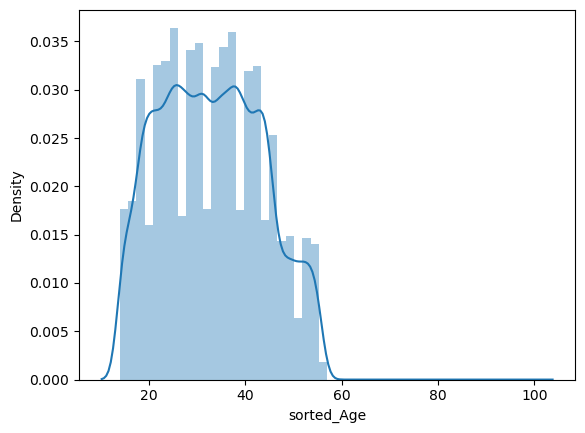

sorted_Annual_Income


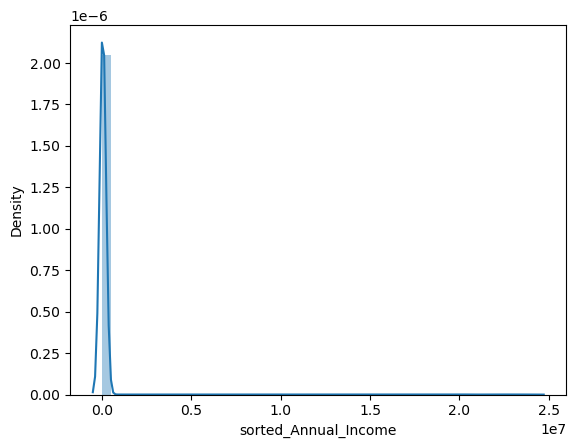

sorted_Num_of_Loan


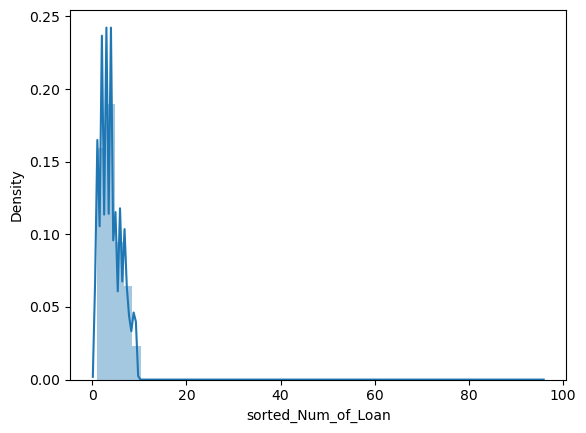

sorted_Num_of_Delayed_Payment


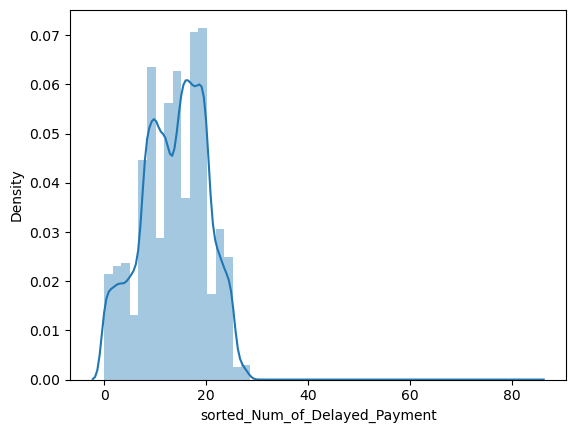

sorted_Changed_Credit_Limit


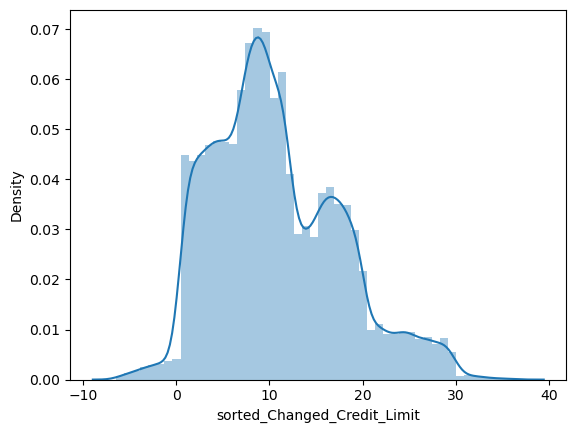

sorted_Outstanding_Debt


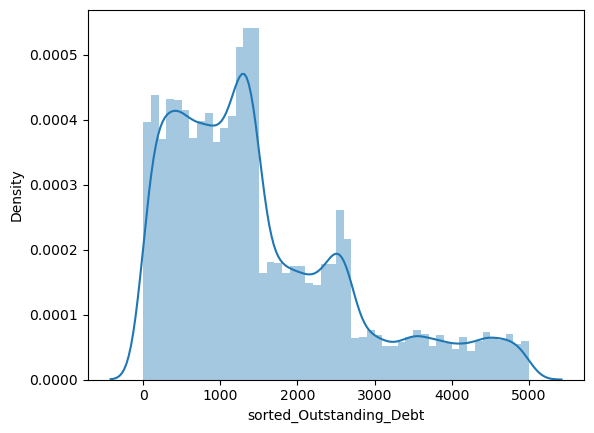

sorted_Credit_History_Age


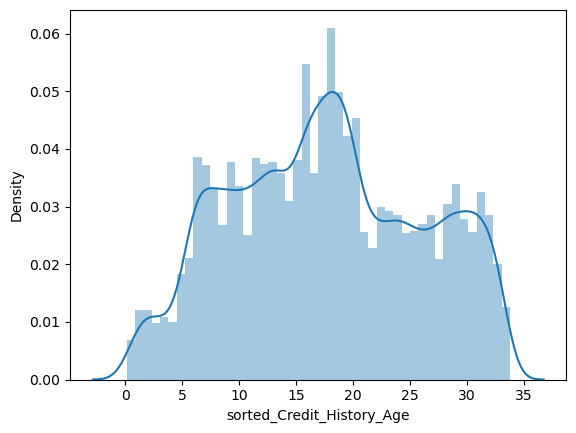

sorted_Amount_invested_monthly


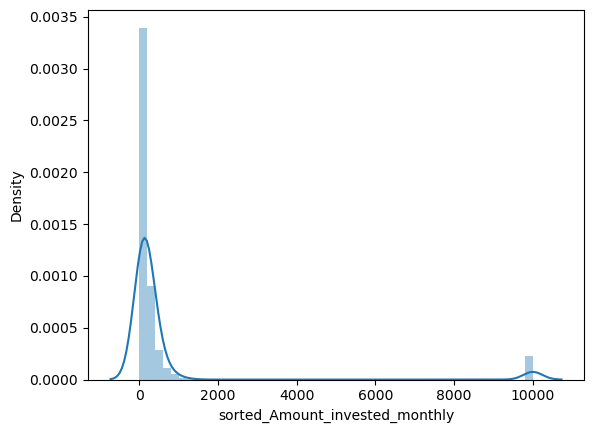

sorted_Monthly_Balance


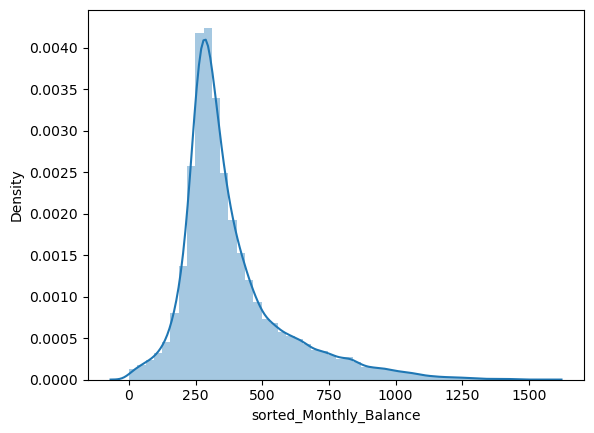

Monthly_Inhand_Salary


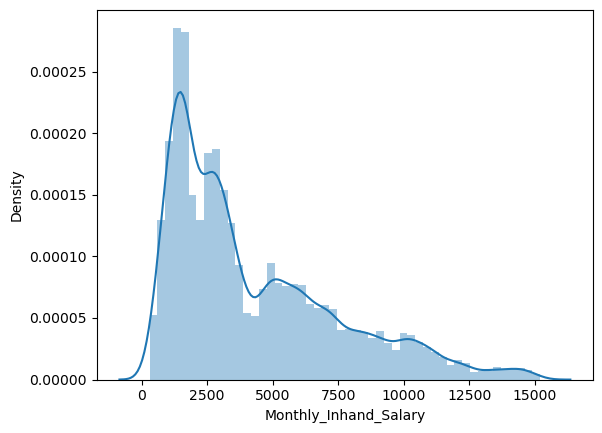

Num_Bank_Accounts


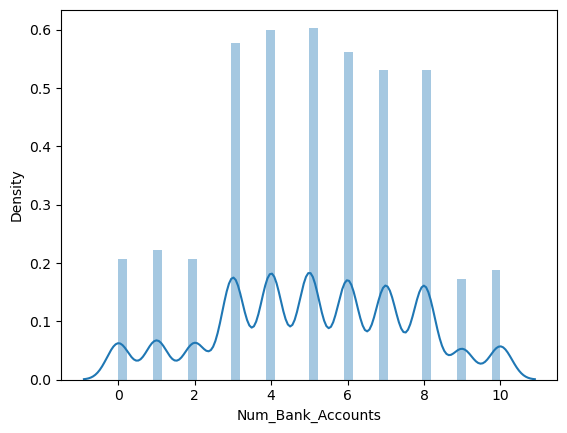

Delay_from_due_date


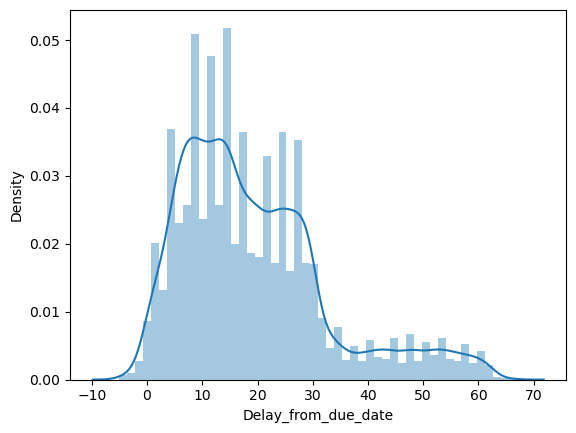

Credit_Utilization_Ratio


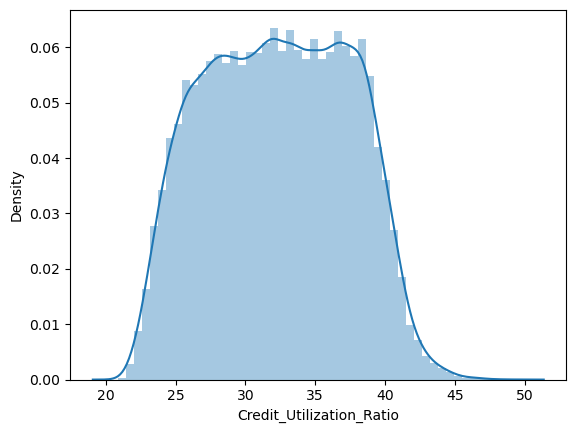

Total_EMI_per_month


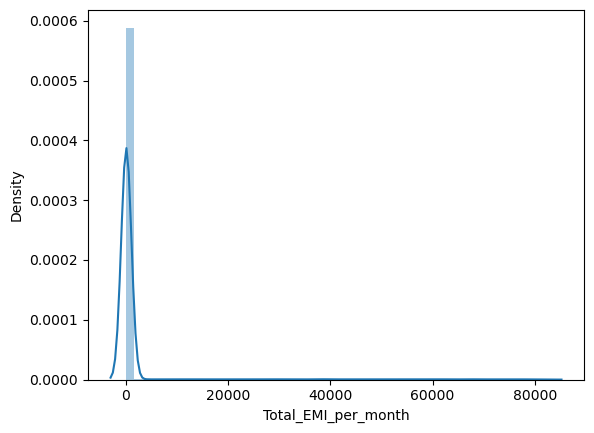

sorted_Num_Credit_Card


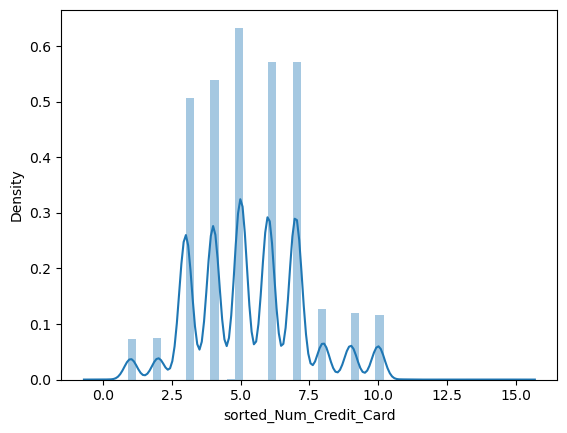

sorted_Interest_Rate


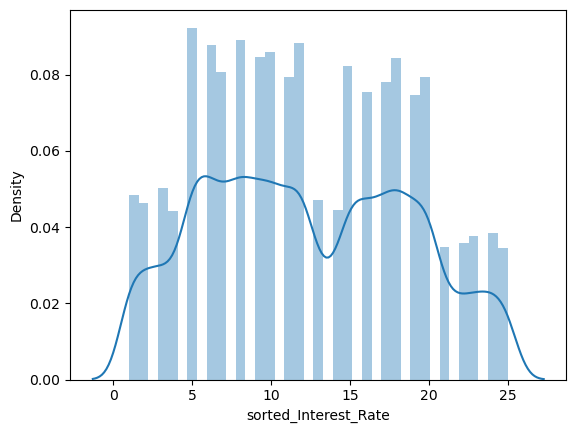

sorted_Num_Credit_Inquiries


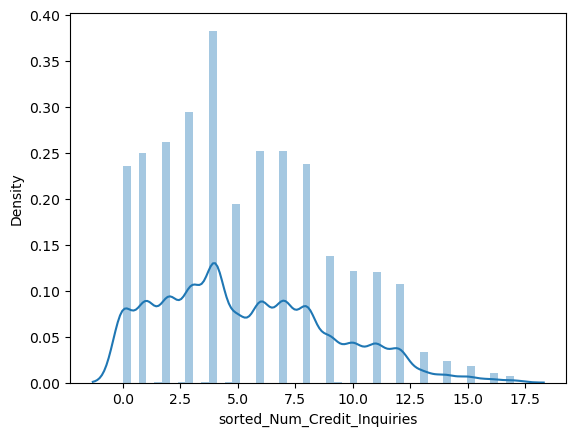

In [376]:
for i in f_num:
    print(i)
    sns.distplot(f_num[i])
    plt.show()

sorted_Age


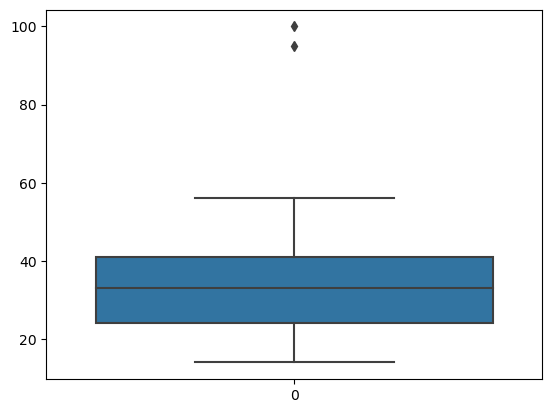

sorted_Annual_Income


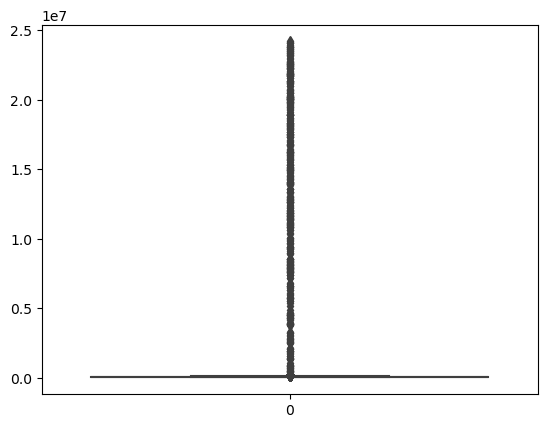

sorted_Num_of_Loan


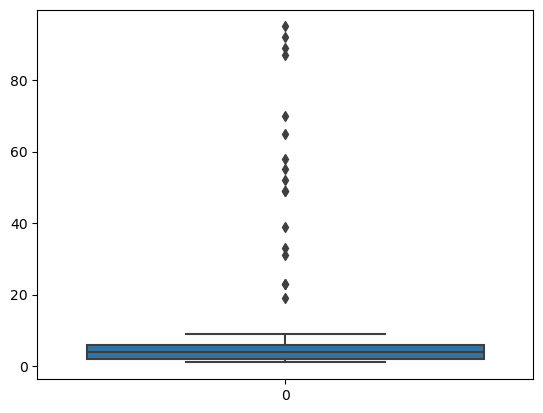

sorted_Num_of_Delayed_Payment


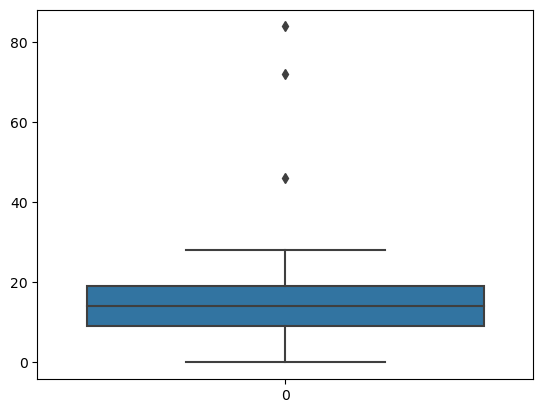

sorted_Changed_Credit_Limit


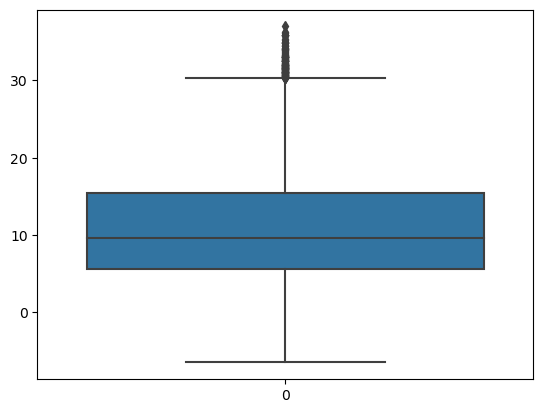

sorted_Outstanding_Debt


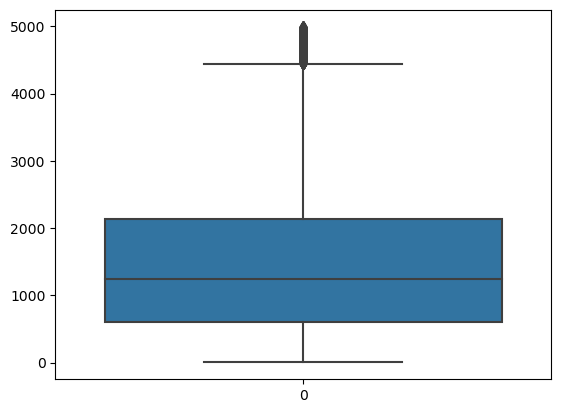

sorted_Credit_History_Age


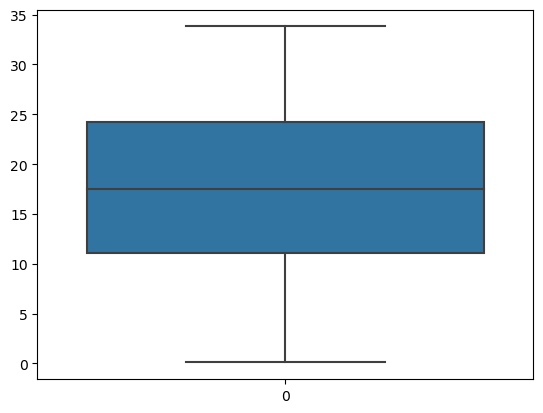

sorted_Amount_invested_monthly


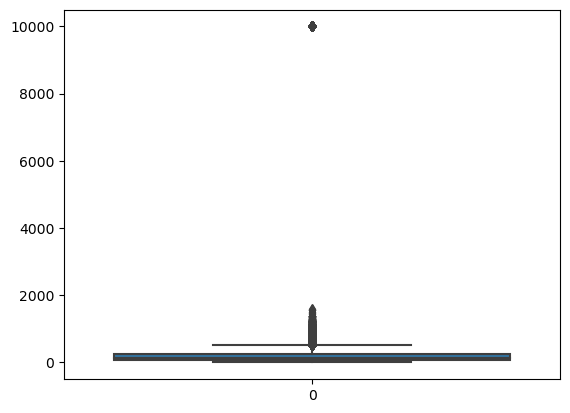

sorted_Monthly_Balance


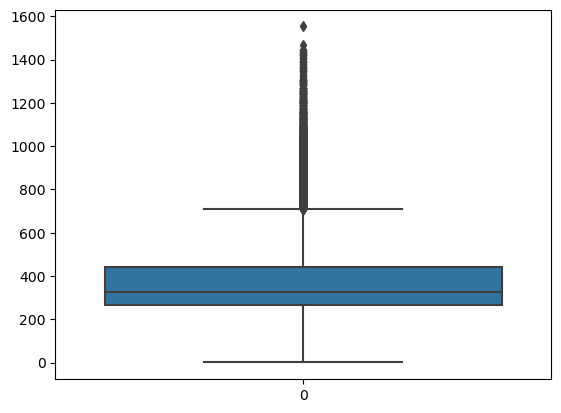

Monthly_Inhand_Salary


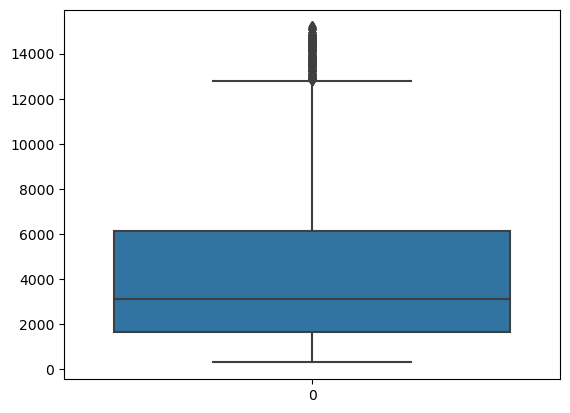

Num_Bank_Accounts


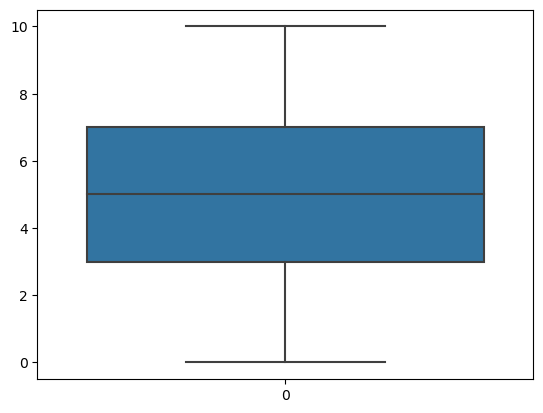

Delay_from_due_date


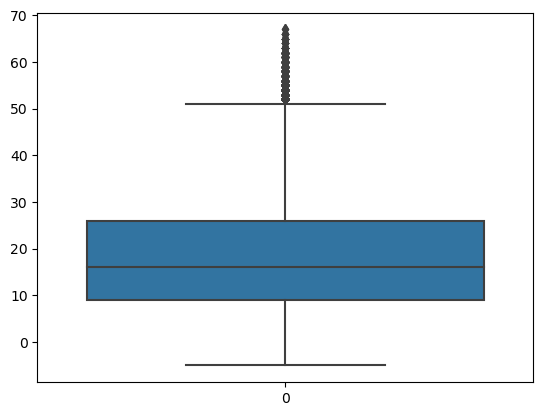

Credit_Utilization_Ratio


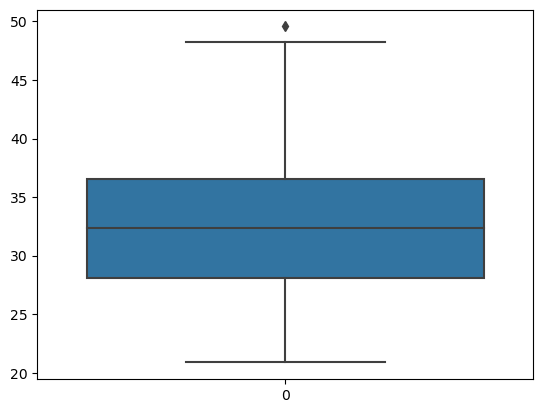

Total_EMI_per_month


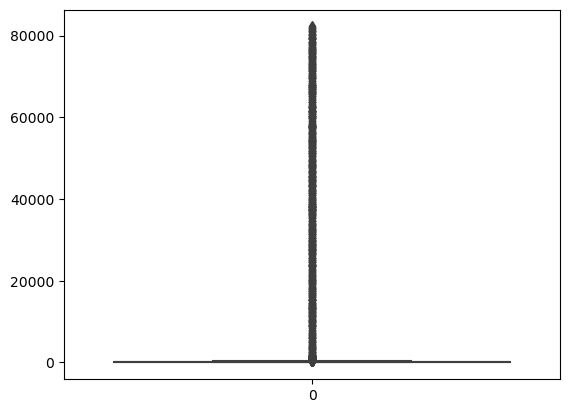

sorted_Num_Credit_Card


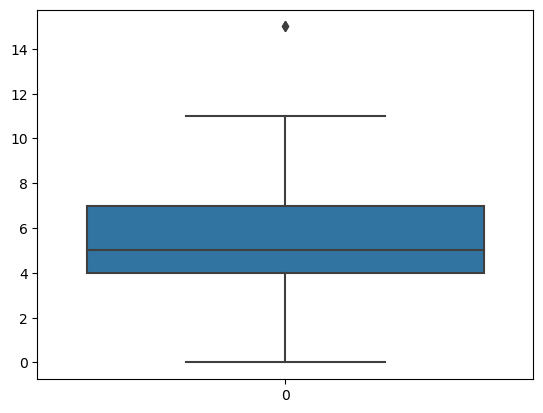

sorted_Interest_Rate


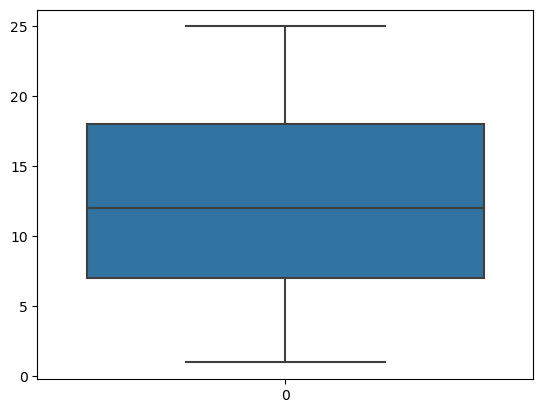

sorted_Num_Credit_Inquiries


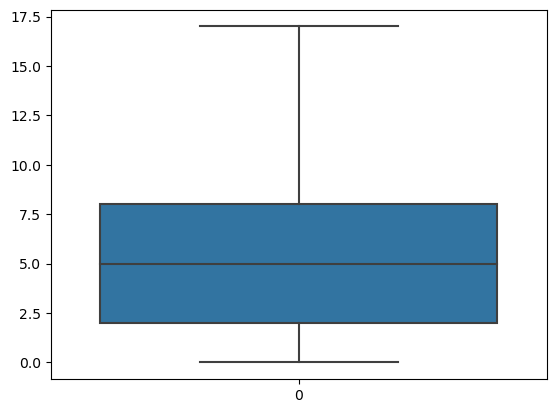

In [377]:
for i in f_num:
    print(i)
    sns.boxplot(f_num[i])
    plt.show()

## Univariate Analysis_Cat cols

In [378]:
final_cat_col = final[[ 'Month', 'Payment_of_Min_Amount', 'Credit_Score', 'sorted_Occupation', 'sorted_Credit_Mix',
'sorted_Payment_Behaviour', 'Credit_Score_new']]

Month


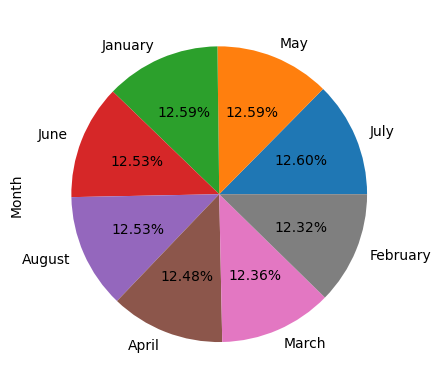

Payment_of_Min_Amount


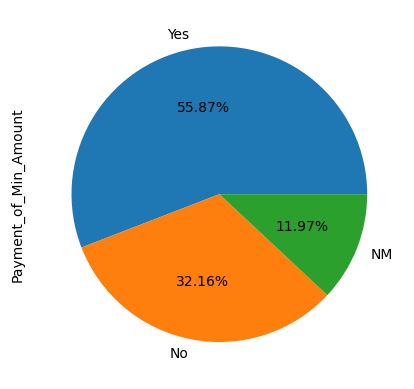

Credit_Score


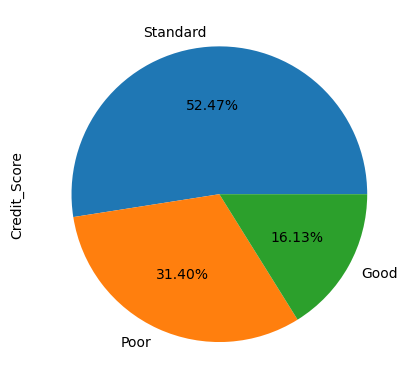

sorted_Occupation


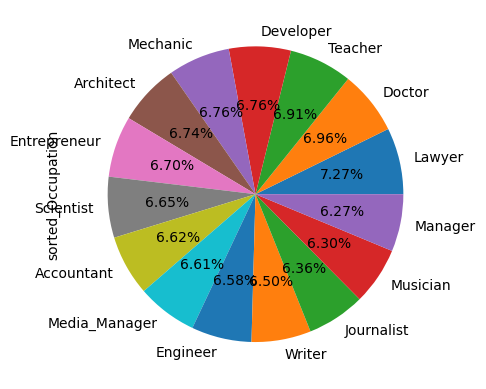

sorted_Credit_Mix


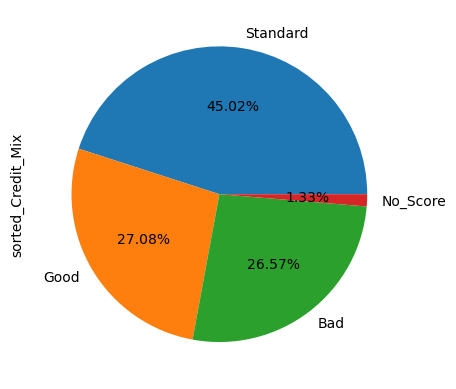

sorted_Payment_Behaviour


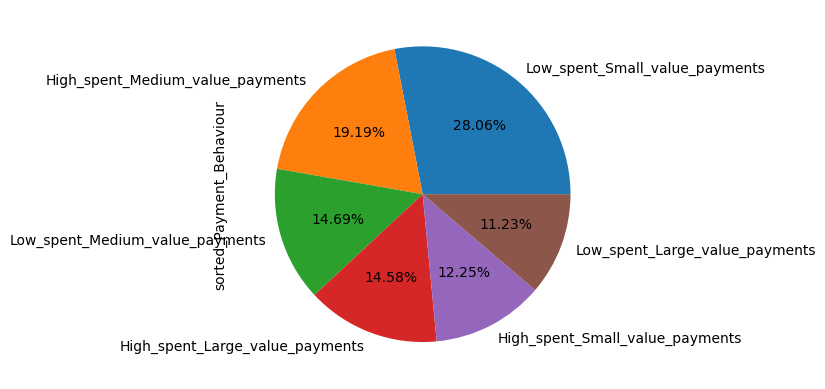

Credit_Score_new


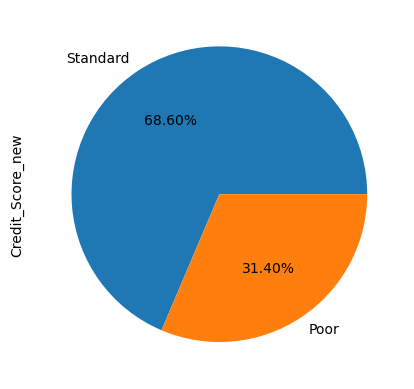

In [379]:
for i in final_cat_col:
    print(i)
    final_cat_col[i].value_counts().plot(kind='pie', autopct='%0.2f%%')
    plt.show()

Month


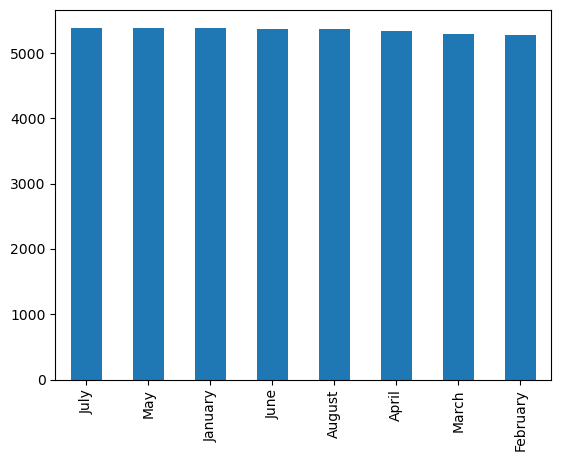

Payment_of_Min_Amount


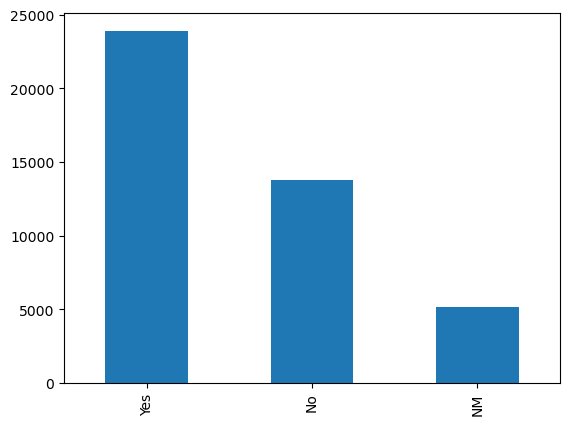

Credit_Score


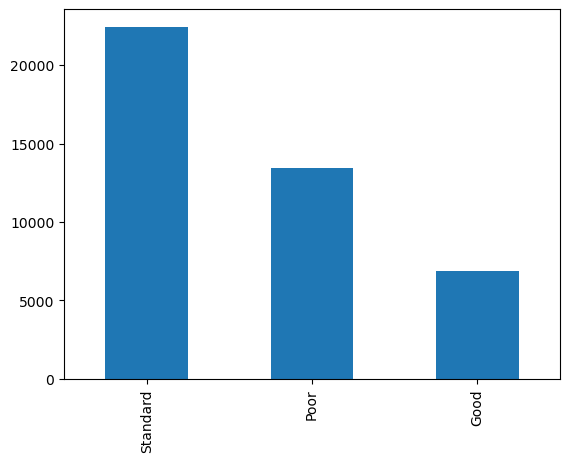

sorted_Occupation


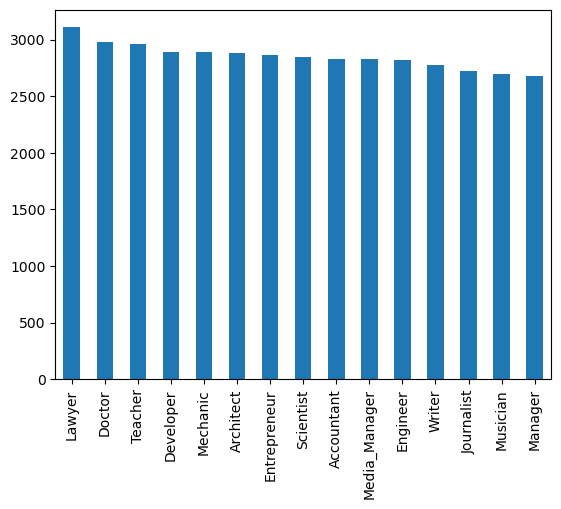

sorted_Credit_Mix


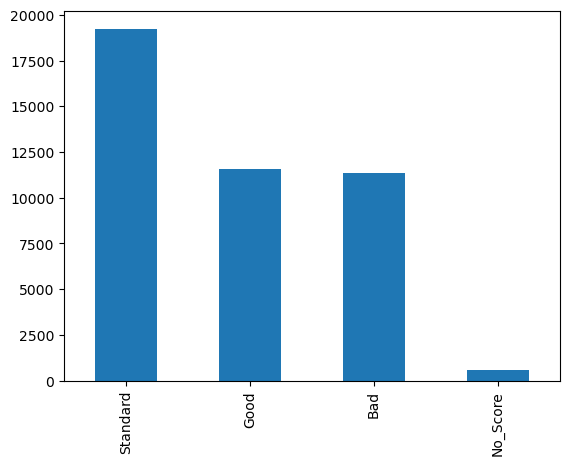

sorted_Payment_Behaviour


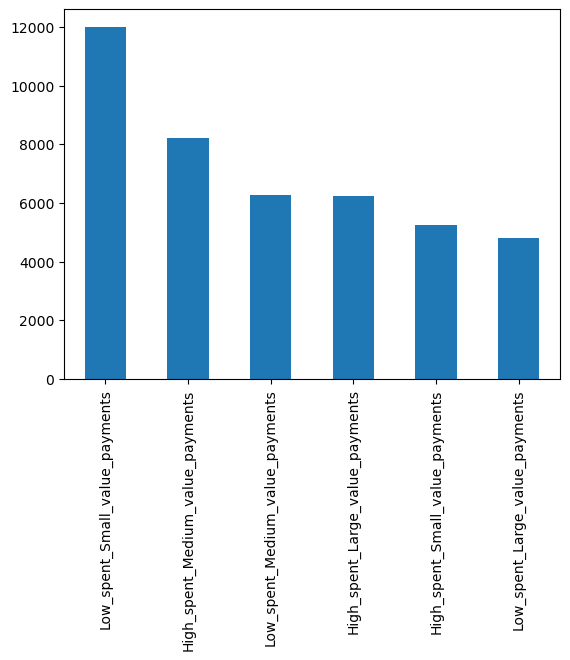

Credit_Score_new


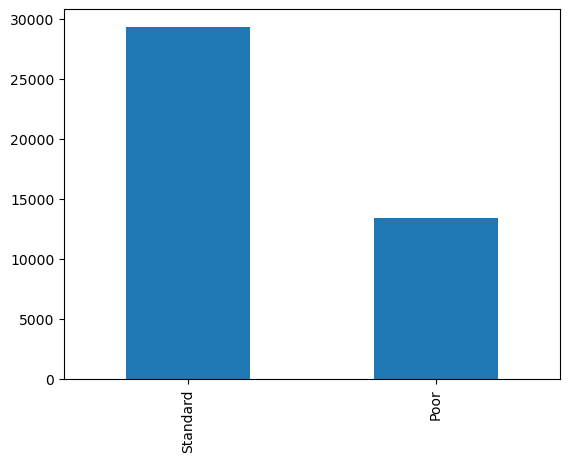

In [380]:
for i in final_cat_col:
    print(i)
    final_cat_col[i].value_counts().plot(kind='bar', stacked=True)
    plt.show()

### Bivariate Analysis_Num vs Target

sorted_Age


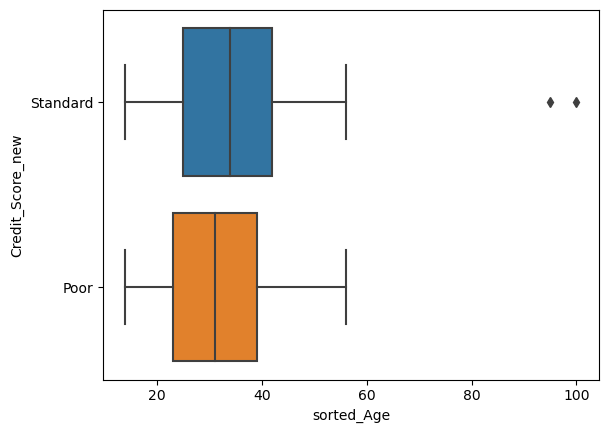

sorted_Annual_Income


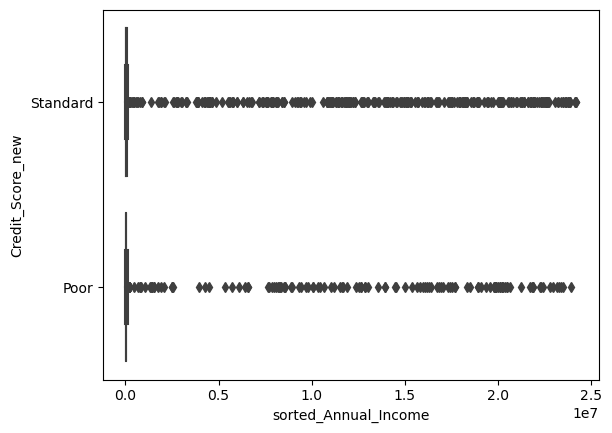

sorted_Num_of_Loan


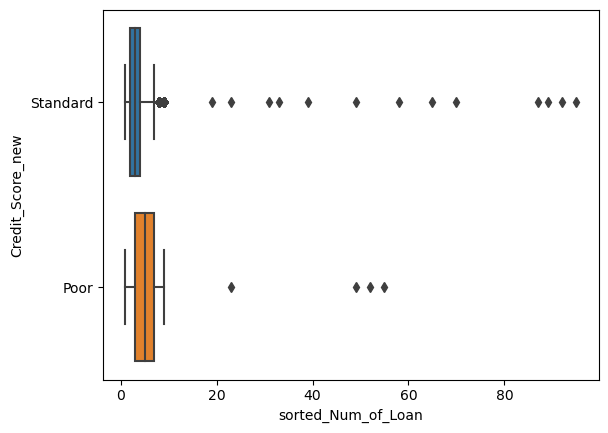

sorted_Num_of_Delayed_Payment


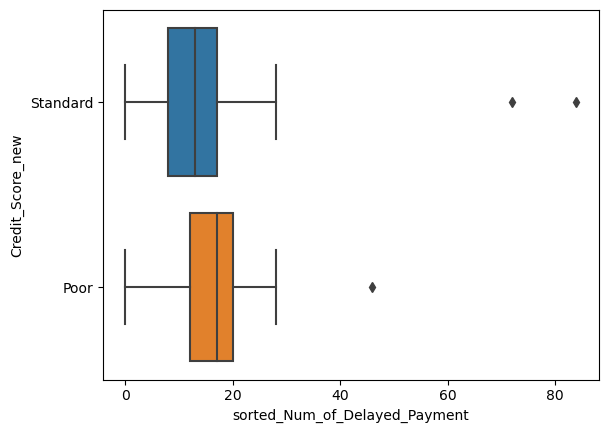

sorted_Changed_Credit_Limit


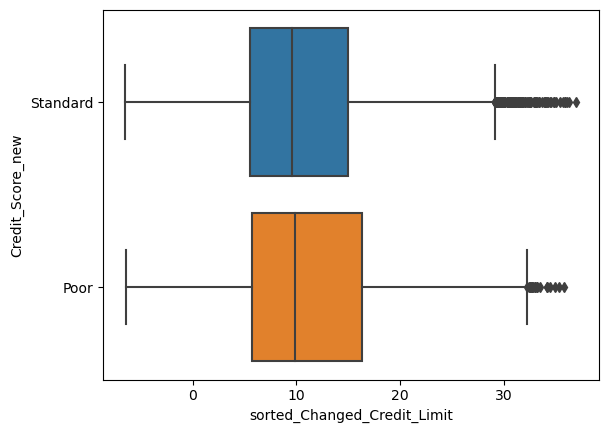

sorted_Outstanding_Debt


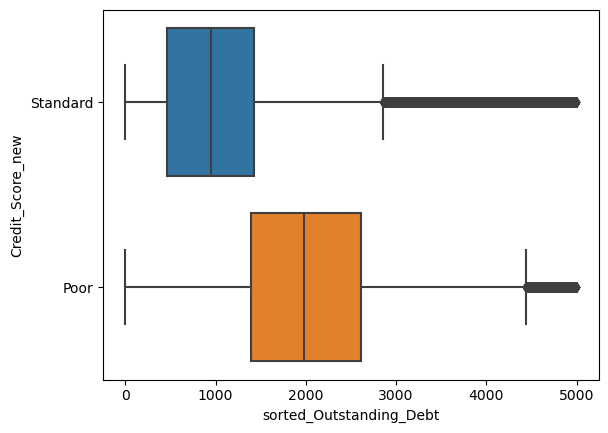

sorted_Credit_History_Age


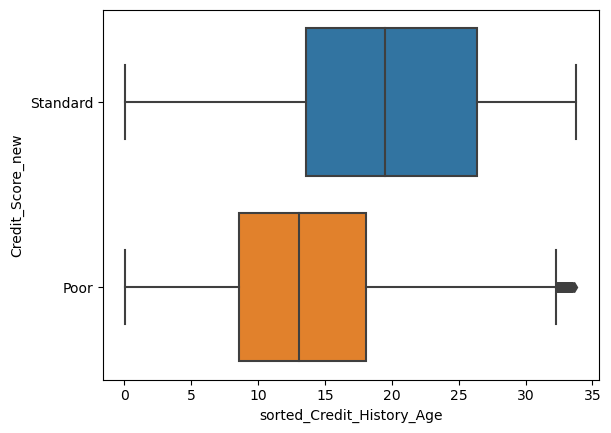

sorted_Amount_invested_monthly


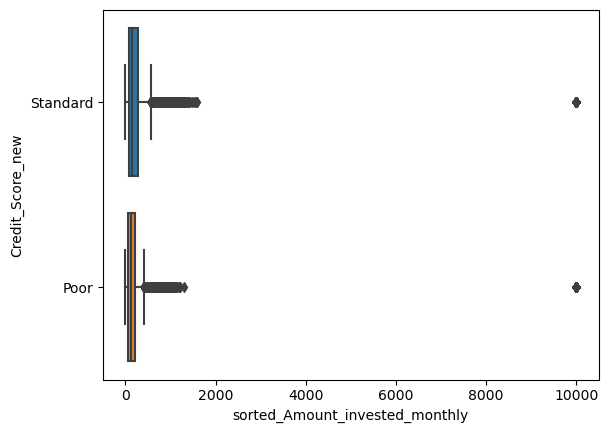

sorted_Monthly_Balance


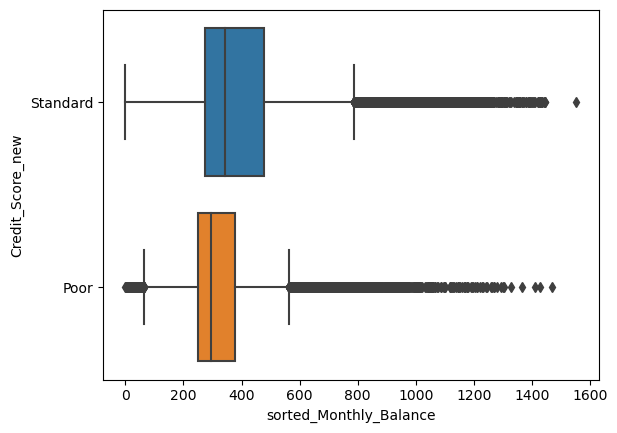

Monthly_Inhand_Salary


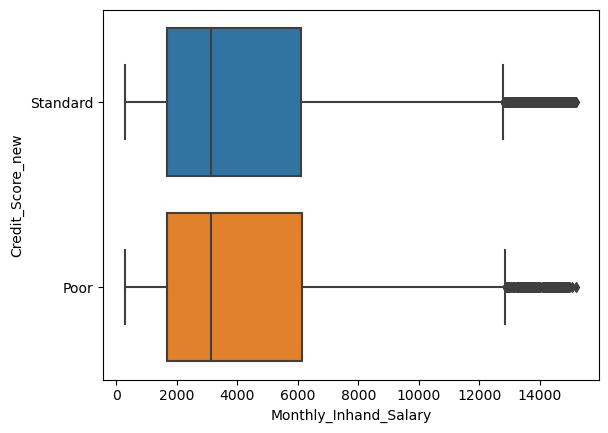

Num_Bank_Accounts


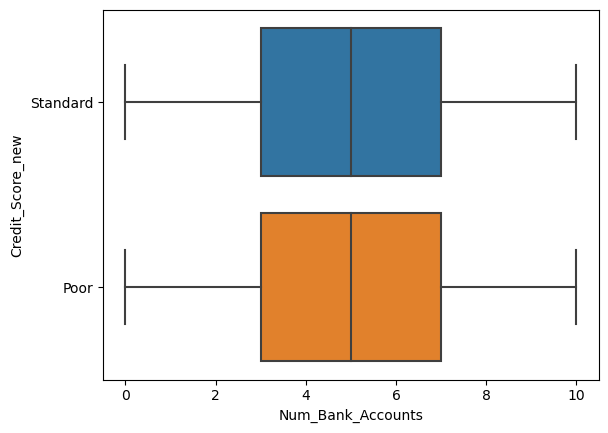

Delay_from_due_date


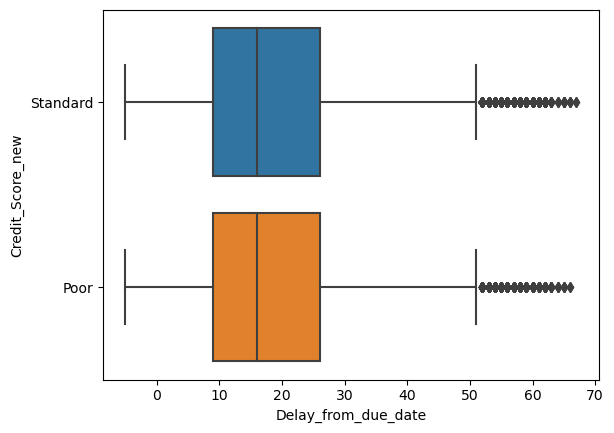

Credit_Utilization_Ratio


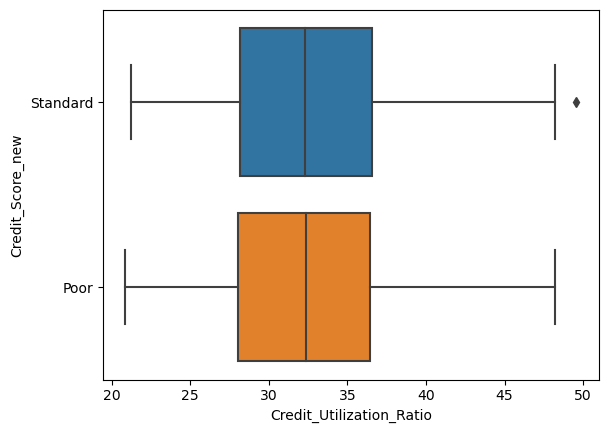

Total_EMI_per_month


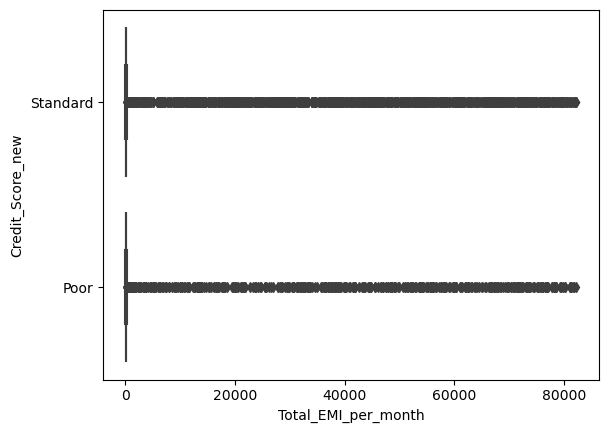

sorted_Num_Credit_Card


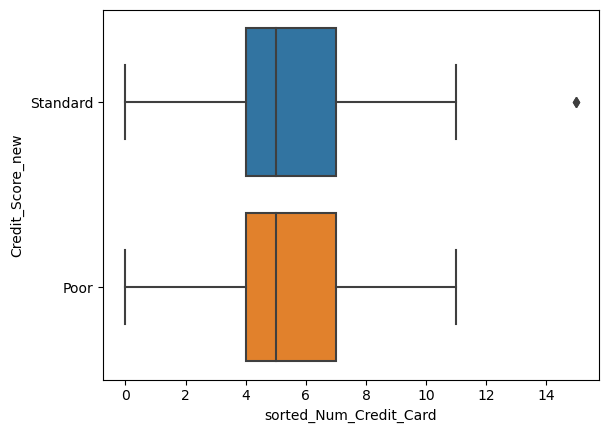

sorted_Interest_Rate


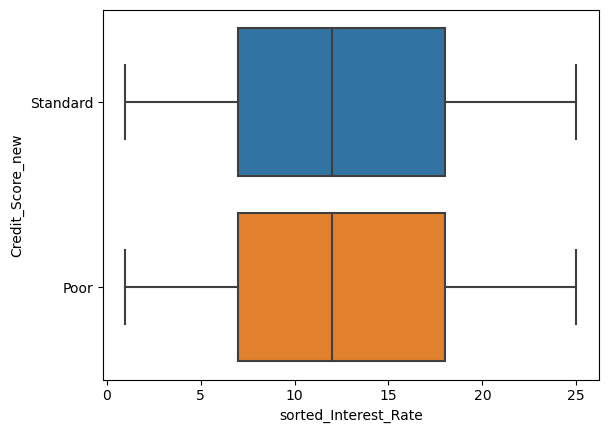

sorted_Num_Credit_Inquiries


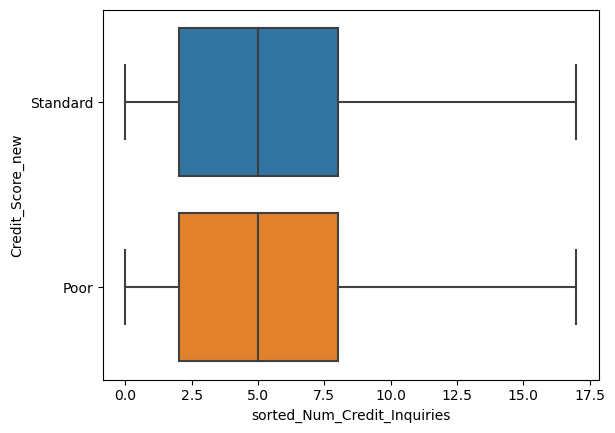

In [381]:
for i in f_num:
    print(i)
    sns.boxplot(x=f_num[i], y=final['Credit_Score_new'])
    plt.show()

In [382]:
final_cat_col

,Month,Payment_of_Min_Amount,Credit_Score,sorted_Occupation,sorted_Credit_Mix,sorted_Payment_Behaviour,Credit_Score_new
0,January,No,Good,Scientist,Good,High_spent_Small_value_payments,Standard
1,July,No,Good,Scientist,Good,Low_spent_Small_value_payments,Standard
2,January,No,Standard,Teacher,Good,Low_spent_Small_value_payments,Standard
3,February,No,Good,Teacher,Good,High_spent_Large_value_payments,Standard
4,March,No,Standard,Teacher,Good,High_spent_Large_value_payments,Standard
...,...,...,...,...,...,...,...
43786,August,No,Standard,Engineer,Good,Low_spent_Small_value_payments,Standard
43787,February,Yes,Poor,Mechanic,Bad,High_spent_Medium_value_payments,Poor
43788,March,Yes,Poor,Mechanic,Bad,Low_spent_Large_value_payments,Poor
43789,April,Yes,Poor,Mechanic,Bad,High_spent_Medium_value_payments,Poor


### Bivariate Analysis_Cat vs Target

In [383]:
# for i in final_cat_col:
#     print(i)
#     final_cat_col.groupby(final_cat_col['Credit_Score_new'])[final_cat_col[i]].count().plot.bar()
#     plt.show()
    

### Multivariate Analysis

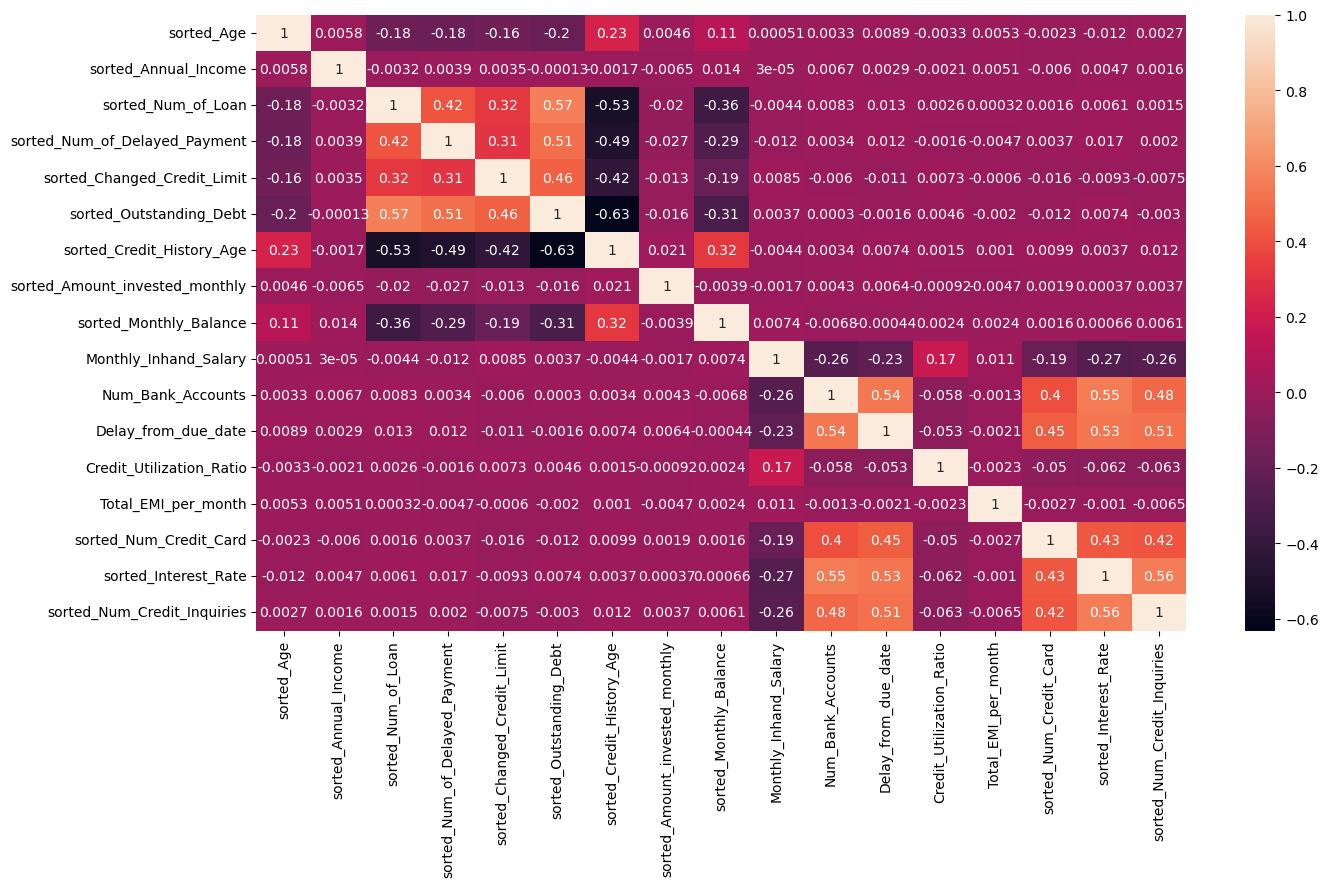

In [384]:
plt.figure(figsize=(15,8))
sns.heatmap(final.corr(), annot=True)
plt.show()

In [385]:
# multivariate analysis for categorical columns

In [386]:
# sns.pairplot(final, kind='reg')

In [387]:
#Scaling and encoding

In [388]:
from platform import python_version
print(python_version())

3.9.16


In [389]:
final.columns

Index(['Customer_ID', 'Month', 'Name', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'sorted_Num_Credit_Card', 'sorted_Interest_Rate',
       'sorted_Num_Credit_Inquiries', 'Credit_Score_new'],
      dtype='object')

In [390]:
final.shape

(42770, 28)

In [391]:
final.nunique()

Customer_ID                        9102
Month                                 8
Name                               7770
Type_of_Loan                       5333
Payment_of_Min_Amount                 3
Credit_Score                          3
sorted_Age                           82
sorted_SSN                         9102
sorted_Occupation                    15
sorted_Annual_Income               9513
sorted_Num_of_Loan                   24
sorted_Num_of_Delayed_Payment        51
sorted_Changed_Credit_Limit        3790
sorted_Credit_Mix                     4
sorted_Outstanding_Debt            8964
sorted_Credit_History_Age           371
sorted_Amount_invested_monthly    40760
sorted_Payment_Behaviour              6
sorted_Monthly_Balance            42768
Monthly_Inhand_Salary              9694
Num_Bank_Accounts                    11
Delay_from_due_date                  73
Credit_Utilization_Ratio          42770
Total_EMI_per_month               11045
sorted_Num_Credit_Card               18


In [392]:
final.head()

,Customer_ID,Month,Name,Type_of_Loan,Payment_of_Min_Amount,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,...,sorted_Monthly_Balance,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries,Credit_Score_new
0,CUS_0xd40,January,Aaron Maashoh,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Good,23.0,821-00-0265,Scientist,19114.12,...,312.494089,1824.843333,3.0,3.0,26.822620,49.574949,4.0,3.0,4.0,Standard
1,CUS_0xd40,July,Aaron Maashoh,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Good,23.0,821-00-0265,Scientist,19114.12,...,244.565317,1824.843333,3.0,3.0,22.537593,49.574949,4.0,3.0,4.0,Standard
2,CUS_0x21b1,January,Rick Rothackerj,Credit-Builder Loan,No,Standard,28.0,004-07-5839,Teacher,34847.84,...,470.690627,3037.986667,2.0,3.0,24.464031,18.816215,4.0,6.0,2.0,Standard
3,CUS_0x21b1,February,Rick Rothackerj,Credit-Builder Loan,No,Good,28.0,004-07-5839,Teacher,34847.84,...,484.591214,3037.986667,2.0,7.0,38.550848,18.816215,4.0,6.0,2.0,Standard
4,CUS_0x21b1,March,Rick Rothackerj,Credit-Builder Loan,No,Standard,28.0,004-07-5839,Teacher,34847.84,...,466.466476,3037.986667,2.0,3.0,33.224951,18.816215,4.0,6.0,2.0,Standard


In [393]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42770 entries, 0 to 43790
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     42770 non-null  object 
 1   Month                           42770 non-null  object 
 2   Name                            42770 non-null  object 
 3   Type_of_Loan                    42770 non-null  object 
 4   Payment_of_Min_Amount           42770 non-null  object 
 5   Credit_Score                    42770 non-null  object 
 6   sorted_Age                      42770 non-null  float64
 7   sorted_SSN                      42770 non-null  object 
 8   sorted_Occupation               42770 non-null  object 
 9   sorted_Annual_Income            42770 non-null  float64
 10  sorted_Num_of_Loan              42770 non-null  float64
 11  sorted_Num_of_Delayed_Payment   42770 non-null  float64
 12  sorted_Changed_Credit_Limit     

In [394]:
# final.to_csv("sorted_bank_data.csv")

In [395]:
final.head(2)

,Customer_ID,Month,Name,Type_of_Loan,Payment_of_Min_Amount,Credit_Score,sorted_Age,sorted_SSN,sorted_Occupation,sorted_Annual_Income,...,sorted_Monthly_Balance,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries,Credit_Score_new
0,CUS_0xd40,January,Aaron Maashoh,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Good,23.0,821-00-0265,Scientist,19114.12,...,312.494089,1824.843333,3.0,3.0,26.822620,49.574949,4.0,3.0,4.0,Standard
1,CUS_0xd40,July,Aaron Maashoh,"Auto Loan, Credit-Builder Loan, Personal Loan,...",No,Good,23.0,821-00-0265,Scientist,19114.12,...,244.565317,1824.843333,3.0,3.0,22.537593,49.574949,4.0,3.0,4.0,Standard


In [396]:
final.columns

Index(['Customer_ID', 'Month', 'Name', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Credit_Score', 'sorted_Age', 'sorted_SSN', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'sorted_Num_Credit_Card', 'sorted_Interest_Rate',
       'sorted_Num_Credit_Inquiries', 'Credit_Score_new'],
      dtype='object')

In [397]:
final.nunique()

Customer_ID                        9102
Month                                 8
Name                               7770
Type_of_Loan                       5333
Payment_of_Min_Amount                 3
Credit_Score                          3
sorted_Age                           82
sorted_SSN                         9102
sorted_Occupation                    15
sorted_Annual_Income               9513
sorted_Num_of_Loan                   24
sorted_Num_of_Delayed_Payment        51
sorted_Changed_Credit_Limit        3790
sorted_Credit_Mix                     4
sorted_Outstanding_Debt            8964
sorted_Credit_History_Age           371
sorted_Amount_invested_monthly    40760
sorted_Payment_Behaviour              6
sorted_Monthly_Balance            42768
Monthly_Inhand_Salary              9694
Num_Bank_Accounts                    11
Delay_from_due_date                  73
Credit_Utilization_Ratio          42770
Total_EMI_per_month               11045
sorted_Num_Credit_Card               18


In [398]:
print(final['sorted_Age'].quantile(0.99))
final['sorted_Age'].max()
# outlier

55.0


100.0

In [399]:

print(final['sorted_Annual_Income'].quantile(0.99))
final['sorted_Annual_Income'].max()
# outlier

179987.28


24198062.0

In [400]:
print(final['sorted_Num_of_Loan'].max())
final['sorted_Num_of_Loan'].quantile(0.99)
# outlier

95.0


9.0

In [401]:
print(final['sorted_Num_of_Delayed_Payment'].quantile(0.99))
final['sorted_Num_of_Delayed_Payment'].max()

25.0


84.0

In [402]:
print(final['sorted_Changed_Credit_Limit'].quantile(0.99))
final['sorted_Changed_Credit_Limit'].max()

28.91


36.97

In [403]:
print(final['sorted_Outstanding_Debt'].quantile(0.99))
final['sorted_Outstanding_Debt'].max()

4820.33


4998.07

In [404]:
print(final['sorted_Credit_History_Age'].quantile(0.99))
final['sorted_Credit_History_Age'].max()

33.0


33.8

In [405]:
print(final['sorted_Amount_invested_monthly'].quantile(0.99))
final['sorted_Amount_invested_monthly'].max()

10000.0


10000.0

In [406]:
# final['sorted_Payment_Behaviour'].unique()

In [407]:
print(final['sorted_Monthly_Balance'].quantile(0.99))
final['sorted_Monthly_Balance'].max()

1060.1956554025144


1552.9460937445635

In [408]:
print(final['Monthly_Inhand_Salary'].quantile(0.99))
final['Monthly_Inhand_Salary'].max()

13931.656666666668


15204.633333333331

In [409]:
print(final['Num_Bank_Accounts'].quantile(0.99))
final['Num_Bank_Accounts'].max()

10.0


10.0

In [410]:
print(final['Delay_from_due_date'].quantile(0.99))
final['Delay_from_due_date'].max()

60.0


67.0

In [411]:
print(final['Credit_Utilization_Ratio'].quantile(0.99))
final['Credit_Utilization_Ratio'].max()

42.251556774995976


49.56451934738699

In [412]:
print(final['Total_EMI_per_month'].quantile(0.99))
final['Total_EMI_per_month'].max()

56001.14999999985


82236.0

In [413]:
print(final['sorted_Num_Credit_Card'].quantile(0.99))
final['sorted_Num_Credit_Card'].max()

10.0


15.0

In [414]:
print(final['sorted_Interest_Rate'].quantile(0.99))
final['sorted_Interest_Rate'].max()

25.0


25.0

In [415]:
print(final['sorted_Num_Credit_Inquiries'].quantile(0.99))
final['sorted_Num_Credit_Inquiries'].max()

15.0


17.0

In [416]:
final['Credit_Score_new'].unique()

array(['Standard', 'Poor'], dtype=object)

In [417]:
# columns to be dropped
# 'Customer_ID','Month','Name','Type_of_Loan','sorted_SSN'

# outliers to be removed from 3 columns
# sorted_Age, sorted_Annual_Income, sorted_Num_of_Loan

In [418]:
final.drop(columns=['Customer_ID','Month','Name','Type_of_Loan','sorted_SSN'], axis=1, inplace=True)

### Removing Outliers

#### sorted_Age

In [419]:
final['sorted_Age'].quantile(0.99)

55.0

In [420]:
final[final['sorted_Age'] > final['sorted_Age'].quantile(0.99)]
# we have just 134 rows which are above quantile 99
# we can remove those outliers in age which are greater than quantile 99 

,Payment_of_Min_Amount,Credit_Score,sorted_Age,sorted_Occupation,sorted_Annual_Income,sorted_Num_of_Loan,sorted_Num_of_Delayed_Payment,sorted_Changed_Credit_Limit,sorted_Credit_Mix,sorted_Outstanding_Debt,...,sorted_Monthly_Balance,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries,Credit_Score_new
1838,No,Poor,56.0,Architect,32011.89,3.0,7.0,6.10,Good,1215.09,...,309.008903,8595.465000,4.0,8.0,32.537905,224.510786,6.0,5.0,8.0,Poor
1839,NM,Poor,56.0,Architect,32011.89,3.0,9.0,4.10,Good,1215.09,...,346.382904,6412.765000,4.0,6.0,38.773856,123.317587,5.0,16.0,1.0,Poor
3174,No,Standard,56.0,Journalist,60841.98,1.0,7.0,3.32,Good,1064.40,...,546.831138,12474.846667,3.0,15.0,41.112265,267.365961,7.0,3.0,2.0,Standard
3195,No,Standard,56.0,Musician,30594.51,3.0,20.0,8.57,Standard,1277.91,...,369.412369,893.707917,6.0,20.0,35.510498,20.156252,4.0,12.0,8.0,Standard
3196,No,Standard,56.0,Musician,30594.51,3.0,21.0,8.57,Standard,1277.91,...,296.042146,893.707917,6.0,20.0,37.684237,20.156252,4.0,12.0,8.0,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43145,Yes,Standard,56.0,Lawyer,27061.84,3.0,17.0,2.01,Standard,936.10,...,392.620097,3375.665000,8.0,31.0,31.265237,1283.000000,4.0,18.0,5.0,Standard
43146,Yes,Standard,56.0,Lawyer,27061.84,3.0,14.0,2.01,Standard,936.10,...,389.336143,2420.876667,5.0,13.0,31.521849,36.650814,6.0,9.0,2.0,Standard
43690,No,Good,56.0,Architect,87621.78,4.0,8.0,2.24,Good,1074.35,...,205.284486,1659.883333,4.0,30.0,26.264920,11.581102,6.0,14.0,3.0,Standard
43691,No,Good,56.0,Architect,87621.78,4.0,10.0,2.24,Good,1074.35,...,618.499743,1659.883333,4.0,25.0,40.354265,11.581102,6.0,14.0,3.0,Standard


In [421]:
final.shape

(42770, 23)

In [422]:
final.drop(final[final['sorted_Age']>final['sorted_Age'].quantile(0.99)].index,axis=0, inplace=True)

In [423]:
final.shape

(42636, 23)

#### sorted_Annual_Income

In [424]:
final['sorted_Annual_Income'].quantile(0.99)

179973.82600000006

In [425]:
final[final['sorted_Annual_Income'] > final['sorted_Annual_Income'].quantile(0.99)]
# we have just 134 rows which are above quantile 99
# we can remove those outliers in age which are greater than quantile 99 

,Payment_of_Min_Amount,Credit_Score,sorted_Age,sorted_Occupation,sorted_Annual_Income,sorted_Num_of_Loan,sorted_Num_of_Delayed_Payment,sorted_Changed_Credit_Limit,sorted_Credit_Mix,sorted_Outstanding_Debt,...,sorted_Monthly_Balance,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries,Credit_Score_new
104,Yes,Standard,40.0,Architect,6515990.0,3.0,12.0,4.89,Standard,400.07,...,339.569471,1684.168333,1.0,5.0,35.942907,29.534584,5.0,1.0,4.0,Standard
167,Yes,Standard,15.0,Entrepreneur,18334118.0,8.0,18.0,20.99,Bad,3422.49,...,257.504994,3224.935000,9.0,57.0,30.188059,133.470845,9.0,16.0,10.0,Standard
270,No,Good,18.0,Scientist,19257912.0,2.0,7.0,6.08,Good,1045.11,...,14.118727,3047.676667,7.0,17.0,28.622880,58.487657,5.0,12.0,4.0,Standard
419,No,Poor,55.0,Doctor,8908998.0,3.0,9.0,3.90,Good,339.11,...,348.221339,3006.266667,1.0,14.0,30.494309,74.690271,6.0,6.0,3.0,Poor
439,Yes,Poor,39.0,Manager,2547968.0,2.0,10.0,5.33,Standard,687.87,...,366.639379,10693.556667,4.0,13.0,38.534724,239.767329,3.0,20.0,0.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43551,Yes,Standard,43.0,Musician,11621521.0,3.0,8.0,10.55,Standard,1795.52,...,276.248391,11942.520000,8.0,29.0,40.684969,225.714808,6.0,13.0,5.0,Standard
43566,No,Good,50.0,Doctor,1353477.0,1.0,0.0,11.75,Good,905.23,...,224.064805,2703.836667,8.0,36.0,32.207534,96.250067,5.0,25.0,6.0,Standard
43628,Yes,Poor,39.0,Teacher,17036597.0,7.0,15.0,2.46,Bad,2083.26,...,352.389688,10374.330000,2.0,9.0,25.439413,241.065885,7.0,1.0,3.0,Poor
43671,No,Good,33.0,Scientist,11770018.0,1.0,3.0,10.36,Good,323.83,...,1074.517001,2799.830833,5.0,10.0,25.363971,113.833391,6.0,8.0,0.0,Standard


In [426]:
final.shape

(42636, 23)

In [427]:
final.drop(final[final['sorted_Annual_Income']>final['sorted_Annual_Income'].quantile(0.99)].index,axis=0, inplace=True)

In [428]:
final.shape

(42209, 23)

#### sorted_Num_of_Loan

In [429]:
final['sorted_Num_of_Loan'].quantile(0.99)

9.0

In [430]:
final[final['sorted_Num_of_Loan'] > final['sorted_Num_of_Loan'].quantile(0.99)]
# we have just 134 rows which are above quantile 99
# we can remove those outliers in age which are greater than quantile 99 

,Payment_of_Min_Amount,Credit_Score,sorted_Age,sorted_Occupation,sorted_Annual_Income,sorted_Num_of_Loan,sorted_Num_of_Delayed_Payment,sorted_Changed_Credit_Limit,sorted_Credit_Mix,sorted_Outstanding_Debt,...,sorted_Monthly_Balance,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,sorted_Num_Credit_Card,sorted_Interest_Rate,sorted_Num_Credit_Inquiries,Credit_Score_new
1719,No,Standard,31.0,Media_Manager,24726.480,49.0,18.0,10.51,Standard,155.22,...,296.628380,2872.802500,4.0,28.0,28.091152,96.661689,3.0,19.0,3.0,Standard
2921,Yes,Standard,28.0,Lawyer,72140.070,92.0,11.0,19.52,Standard,638.12,...,689.259641,10709.912500,1.0,17.0,25.696781,320.676001,3.0,7.0,4.0,Standard
3154,Yes,Good,36.0,Accountant,16564.890,39.0,9.0,18.09,Standard,1382.82,...,249.365006,2398.818333,6.0,8.0,26.466784,82.278110,6.0,11.0,5.0,Standard
5173,Yes,Poor,42.0,Engineer,34019.260,52.0,15.0,6.46,Bad,1747.01,...,161.938054,6459.940000,6.0,17.0,28.105932,289.471213,7.0,23.0,6.0,Poor
5972,Yes,Standard,42.0,Media_Manager,70014.480,33.0,12.0,11.25,Standard,876.04,...,316.805853,2842.866667,8.0,57.0,30.962306,226.324824,6.0,22.0,7.0,Standard
7818,No,Standard,32.0,Writer,97338.210,58.0,12.0,11.68,Standard,1052.21,...,591.741263,512.149583,4.0,20.0,38.176695,16.798847,7.0,7.0,7.0,Standard
9584,Yes,Standard,35.0,Lawyer,14192.120,95.0,8.0,16.33,Standard,1483.60,...,313.246238,2704.236667,6.0,26.0,29.984551,19.921125,4.0,11.0,5.0,Standard
11334,Yes,Standard,23.0,Mechanic,20929.340,70.0,8.0,12.28,Standard,695.45,...,369.615888,2427.606667,9.0,41.0,35.315502,65.640664,7.0,19.0,6.0,Standard
12742,NM,Poor,16.0,Writer,10062.820,55.0,6.0,18.18,Standard,2089.58,...,269.549559,2236.265000,4.0,8.0,33.311924,15.159224,4.0,2.0,0.0,Poor
13201,No,Good,26.0,Lawyer,25322.830,89.0,18.0,8.25,Good,266.33,...,334.471309,1481.371667,8.0,59.0,24.842508,60.382667,7.0,22.0,10.0,Standard


In [431]:
final.shape

(42209, 23)

In [432]:
final.drop(final[final['sorted_Num_of_Loan']>final['sorted_Num_of_Loan'].quantile(0.99)].index,axis=0, inplace=True)

In [433]:
final.shape

(42192, 23)

In [434]:
final.columns

Index(['Payment_of_Min_Amount', 'Credit_Score', 'sorted_Age',
       'sorted_Occupation', 'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Credit_History_Age', 'sorted_Amount_invested_monthly',
       'sorted_Payment_Behaviour', 'sorted_Monthly_Balance',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'sorted_Num_Credit_Card', 'sorted_Interest_Rate',
       'sorted_Num_Credit_Inquiries', 'Credit_Score_new'],
      dtype='object')

In [435]:
final.shape

(42192, 23)

In [436]:
# further columns to be reduced
# Credit_Score, sorted_Monthly_Balance, Monthly_Inhand_Salary, sorted_Credit_History_Age, sorted_Amount_invested_monthly
# Num_Bank_Accounts , sorted_Num_Credit_Inquiries

In [437]:
final.drop(columns=['Credit_Score', 'sorted_Monthly_Balance', 'Monthly_Inhand_Salary', 'sorted_Credit_History_Age', 
                    'sorted_Amount_invested_monthly','Num_Bank_Accounts' ,'sorted_Num_Credit_Inquiries'], 
           axis=1, inplace=True)

In [438]:
final.shape

(42192, 16)

In [439]:
final.columns

Index(['Payment_of_Min_Amount', 'sorted_Age', 'sorted_Occupation',
       'sorted_Annual_Income', 'sorted_Num_of_Loan',
       'sorted_Num_of_Delayed_Payment', 'sorted_Changed_Credit_Limit',
       'sorted_Credit_Mix', 'sorted_Outstanding_Debt',
       'sorted_Payment_Behaviour', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'sorted_Num_Credit_Card', 'sorted_Interest_Rate', 'Credit_Score_new'],
      dtype='object')

In [440]:
final.rename(columns={
    'Credit_Score_new':'Credit_Score',
    'sorted_Age':'Age',
    'sorted_Occupation':'Occupation',
    'sorted_Annual_Income':'Annual_Income',
    'sorted_Num_of_Loan':'Num_of_Loan',
    'sorted_Num_of_Delayed_Payment':'Num_of_Delayed_Payment',
    'sorted_Changed_Credit_Limit':'Changed_Credit_Limit',
    'sorted_Credit_Mix':'Credit_Mix',
    'sorted_Outstanding_Debt':'Outstanding_Debt',
    'sorted_Payment_Behaviour':'Payment_Behaviour',
    'sorted_Num_Credit_Card':'Num_Credit_Card',
    'sorted_Interest_Rate':'Interest_Rate'    
}, inplace=True)

In [441]:
final.columns

Index(['Payment_of_Min_Amount', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_Behaviour',
       'Delay_from_due_date', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Num_Credit_Card', 'Interest_Rate',
       'Credit_Score'],
      dtype='object')

In [442]:
# final.to_csv("sorted_bank_data_final.csv")

In [443]:
final.head()

,Payment_of_Min_Amount,Age,Occupation,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_Behaviour,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,Num_Credit_Card,Interest_Rate,Credit_Score
0,No,23.0,Scientist,19114.12,4.0,7.0,11.27,Good,809.98,High_spent_Small_value_payments,3.0,26.822620,49.574949,4.0,3.0,Standard
1,No,23.0,Scientist,19114.12,4.0,8.0,11.27,Good,809.98,Low_spent_Small_value_payments,3.0,22.537593,49.574949,4.0,3.0,Standard
2,No,28.0,Teacher,34847.84,1.0,4.0,5.42,Good,605.03,Low_spent_Small_value_payments,3.0,24.464031,18.816215,4.0,6.0,Standard
3,No,28.0,Teacher,34847.84,1.0,1.0,7.42,Good,605.03,High_spent_Large_value_payments,7.0,38.550848,18.816215,4.0,6.0,Standard
4,No,28.0,Teacher,34847.84,1.0,1.0,5.42,Good,605.03,High_spent_Large_value_payments,3.0,33.224951,18.816215,4.0,6.0,Standard


In [444]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42192 entries, 0 to 43790
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Payment_of_Min_Amount     42192 non-null  object 
 1   Age                       42192 non-null  float64
 2   Occupation                42192 non-null  object 
 3   Annual_Income             42192 non-null  float64
 4   Num_of_Loan               42192 non-null  float64
 5   Num_of_Delayed_Payment    42192 non-null  float64
 6   Changed_Credit_Limit      42192 non-null  float64
 7   Credit_Mix                42192 non-null  object 
 8   Outstanding_Debt          42192 non-null  float64
 9   Payment_Behaviour         42192 non-null  object 
 10  Delay_from_due_date       42192 non-null  float64
 11  Credit_Utilization_Ratio  42192 non-null  float64
 12  Total_EMI_per_month       42192 non-null  float64
 13  Num_Credit_Card           42192 non-null  float64
 14  Intere

In [445]:
final.columns

Index(['Payment_of_Min_Amount', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_Behaviour',
       'Delay_from_due_date', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Num_Credit_Card', 'Interest_Rate',
       'Credit_Score'],
      dtype='object')

In [446]:
# libraries for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

### Encoding

In [447]:
final_cat = final.select_dtypes(include = object)
final_num = final.select_dtypes(exclude = object)

In [448]:
final_cat.head()
# final_num.head()

,Payment_of_Min_Amount,Occupation,Credit_Mix,Payment_Behaviour,Credit_Score
0,No,Scientist,Good,High_spent_Small_value_payments,Standard
1,No,Scientist,Good,Low_spent_Small_value_payments,Standard
2,No,Teacher,Good,Low_spent_Small_value_payments,Standard
3,No,Teacher,Good,High_spent_Large_value_payments,Standard
4,No,Teacher,Good,High_spent_Large_value_payments,Standard


In [449]:
encod_final_cat = pd.get_dummies(final_cat, drop_first=True)

In [450]:
encod_final_cat.head()

,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_No_Score,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Standard
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [451]:
encod_final_cat['Credit_Mix_Standard'].value_counts()

0    23187
1    19005
Name: Credit_Mix_Standard, dtype: int64

### Scaling

In [452]:
print("Skewness")
print('')
for i in final_num:
    print(i,':',final_num[i].skew())
#     print('')

Skewness

Age : 0.1522691351744584
Annual_Income : 1.2086112962533062
Num_of_Loan : 0.566617985617098
Num_of_Delayed_Payment : -0.17477709012414971
Changed_Credit_Limit : 0.6019691408112199
Outstanding_Debt : 1.0793776814232356
Delay_from_due_date : 1.0973487984402919
Credit_Utilization_Ratio : 0.012969545343275065
Total_EMI_per_month : 6.981034528983902
Num_Credit_Card : 0.27339237911702186
Interest_Rate : 0.12477074024745269


In [453]:
mms = MinMaxScaler()
scaled_final = pd.DataFrame(mms.fit_transform(final_num), columns=final_num.columns)

In [454]:
scaled_final.head()

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Delay_from_due_date,Credit_Utilization_Ratio,Total_EMI_per_month,Num_Credit_Card,Interest_Rate
0,0.219512,0.070013,0.375,0.083333,0.408516,0.161968,0.111111,0.207137,0.000549,0.266667,0.083333
1,0.219512,0.070013,0.375,0.095238,0.408516,0.161968,0.111111,0.057746,0.000549,0.266667,0.083333
2,0.341463,0.160989,0.000,0.047619,0.273878,0.120958,0.111111,0.124908,0.000175,0.266667,0.208333
3,0.341463,0.160989,0.000,0.011905,0.319908,0.120958,0.166667,0.616025,0.000175,0.266667,0.208333
4,0.341463,0.160989,0.000,0.011905,0.273878,0.120958,0.111111,0.430345,0.000175,0.266667,0.208333


In [455]:
final.shape

(42192, 16)

In [456]:
scaled_final = scaled_final.reset_index(drop=True)
encod_final_cat = encod_final_cat.reset_index(drop=True)

In [457]:
df = pd.concat([scaled_final,encod_final_cat], axis=1)

In [458]:
df.shape

(42192, 36)

### Fitting a Base Model

In [459]:
df.columns

Index(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Delay_from_due_date',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Num_Credit_Card',
       'Interest_Rate', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_No_Score',
       'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Paymen

In [460]:
X = df.drop('Credit_Score_Standard', axis=1)
y = df['Credit_Score_Standard']

In [461]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [462]:
Xc = sm.add_constant(X)
logit_model = sm.Logit(y, Xc).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 23.808919
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     Credit_Score_Standard   No. Observations:                42192
Model:                             Logit   Df Residuals:                    42156
Method:                              MLE   Df Model:                           35
Date:                   Sat, 17 Jun 2023   Pseudo R-squ.:                     inf
Time:                           17:17:03   Log-Likelihood:            -1.0045e+06
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
con

In [464]:
# pval = logit_model.pvalues[1:]

# col1 - 0.97
# col2 - 0.04
# col3 - 0.45

# 0.97 - col1

In [465]:
# Customized RFE for feature selection
cols = list(X.columns)

while len(cols)>0:
    Xc = sm.add_constant(X[cols])
    logit_model = sm.Logit(y, Xc).fit() 
    pval = logit_model.pvalues[1:]
    max_pval = pval.max()
    f_r = pval.idxmax()
    
    if max_pval > 0.05:
        cols.remove(f_r)
    else:
        break
        
print("Significant Features,", cols)

Optimization terminated successfully.
         Current function value: 23.808919
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.808880
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.812354
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.809868
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.811215
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.813397
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.805654
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.801069
         Iterations 6
Optimization terminated successfully.
         Current function value: 23.795538
         Iterations 6
Optimization terminated successfully.
         Current function value: 23

In [466]:
significant_features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 
                       'Outstanding_Debt', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
                       'Occupation_Entrepreneur', 'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_No_Score', 
                       'Credit_Mix_Standard', 'Payment_Behaviour_Low_spent_Large_value_payments', 
                       'Payment_Behaviour_Low_spent_Medium_value_payments', 
                       'Payment_Behaviour_Low_spent_Small_value_payments']
len(significant_features)

15

In [467]:
X.shape

(42192, 35)

In [468]:
X.shape

(42192, 35)

In [469]:
# Building another base model

Xc= sm.add_constant(X[significant_features])
logit_model_2 = sm.Logit(y, Xc).fit()
print(logit_model_2.summary())

Optimization terminated successfully.
         Current function value: 23.727961
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     Credit_Score_Standard   No. Observations:                42192
Model:                             Logit   Df Residuals:                    42176
Method:                              MLE   Df Model:                           15
Date:                   Sat, 17 Jun 2023   Pseudo R-squ.:                     inf
Time:                           17:17:44   Log-Likelihood:            -1.0011e+06
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const

In [470]:
# lets implement using sklearnn algorithms using this selected feature

In [471]:
X.shape

(42192, 35)

In [472]:
X = X[significant_features]

In [473]:
X.shape

(42192, 15)

In [474]:
x_train, x_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [475]:
x_train.shape

(33753, 15)

In [476]:
def print_metrics(y_test, y_pred, model_name):
    print("The results of model:", model_name)
    print('')
    print("Accuarcy_score=", accuracy_score(y_test, y_pred))
    print('')
    print("Precision_score=", precision_score(y_test, y_pred))
    print('')
    print("Recall_score=", recall_score(y_test, y_pred))
    print('')
    print("f1_score=", f1_score(y_test, y_pred))
    print('')

In [477]:
def plot_metrics(clf, x_test, y_test, model_name):
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [478]:
# fit and evaluate all the modeland choose the best to deploy
clfs = {
    'LogisticRegression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVM':SVC()
}

# create an empty dataframe of metrics
models_report = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Precision',
                                    'f1_score'])

# fit and evaluate each model
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, Y_train)
    print('Fitting Classifier....', clf_name)
    Y_pred=clf.predict(x_test)
    t=pd.Series({
        'Model_name':clf_name,
        'Accuracy':accuracy_score(Y_test, Y_pred),
        'Recall':recall_score(Y_test, Y_pred),
        'Precision':precision_score(Y_test, Y_pred),
        'f1_score':f1_score(Y_test, Y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier.... LogisticRegression
Fitting Classifier.... Naive Bayes
Fitting Classifier.... KNN
Fitting Classifier.... DecisionTreeClassifier
Fitting Classifier.... RandomForestClassifier
Fitting Classifier.... AdaBoostClassifier
Fitting Classifier.... GradientBoostingClassifier
Fitting Classifier.... XGBClassifier
Fitting Classifier.... SVM


,Model_name,Accuracy,Recall,Precision,f1_score
4,RandomForestClassifier,0.842043,0.893654,0.876389,0.884937
7,XGBClassifier,0.829719,0.889993,0.863644,0.876621
3,DecisionTreeClassifier,0.827942,0.856869,0.886224,0.871299
6,GradientBoostingClassifier,0.798791,0.887029,0.828935,0.856998
8,SVM,0.787653,0.888773,0.815419,0.850517
2,KNN,0.787416,0.861227,0.831930,0.846325
5,AdaBoostClassifier,0.777580,0.867503,0.816675,0.841322
0,LogisticRegression,0.741913,0.888773,0.768002,0.823986
1,Naive Bayes,0.724256,0.710948,0.859069,0.778022


In [479]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [480]:
# after hyper parameter tuning
# find important features algorithms
# voting classifier and stacking 

In [482]:
# rf - 1
# xg - 0
# dc - 1

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the data to find the best hyperparameters
grid_search.fit(X, y)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_